In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chatok-jnr/CSE432_Mental_Wellbeing/refs/heads/main/mental_health_social_media_dataset.csv')

# Mental Health Social Media Dataset Analysis

## Project Overview
This project aims to predict mental health states (Stressed, Healthy, At_risk) based on social media usage patterns and lifestyle factors.

---

## 1. Data Loading and Initial Inspection

In [3]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("Column Names and Data Types:")
print("="*80)
print(df.dtypes)
print("\n" + "="*80)
print("First Few Rows:")
print("="*80)
df.head()

Dataset Shape: (5000, 15)

Column Names and Data Types:
person_name                     object
age                              int64
date                            object
gender                          object
platform                        object
daily_screen_time_min            int64
social_media_time_min            int64
negative_interactions_count      int64
positive_interactions_count      int64
sleep_hours                    float64
physical_activity_min            int64
anxiety_level                    int64
stress_level                     int64
mood_level                       int64
mental_state                    object
dtype: object

First Few Rows:


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Myra Kale,25,2/8/2024,Female,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed
1,Sonal Verma,19,4/3/2024,Female,YouTube,518,311,1,4,6.4,8,3,8,5,Stressed
2,Vihaan Khan,23,4/6/2024,Male,WhatsApp,515,129,1,1,6.4,8,2,7,6,Stressed
3,Saanvi Deshmukh,24,5/31/2024,Female,Instagram,517,258,1,3,6.4,8,3,8,5,Stressed
4,Reyansh Deshmukh,22,8/25/2024,Female,Snapchat,518,285,1,3,6.4,8,3,8,5,Stressed


---

## 2. Data Cleaning

In [4]:
# Create a copy of the original dataframe to preserve the raw data
df_clean = df.copy()

# Display initial shape before cleaning
print("Initial Dataset Shape:", df_clean.shape)
print("\n" + "="*80)

Initial Dataset Shape: (5000, 15)



### 2.1 Drop Unnecessary Columns
Remove `person_name` and `date` columns as they don't contribute to the prediction model.

In [5]:
# Drop person_name and date columns - they are not features for prediction
columns_to_drop = ['person_name', 'date']
df_clean = df_clean.drop(columns=columns_to_drop)

print("Columns dropped:", columns_to_drop)
print("Remaining columns:", df_clean.columns.tolist())
print("New shape:", df_clean.shape)

Columns dropped: ['person_name', 'date']
Remaining columns: ['age', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']
New shape: (5000, 13)


### 2.2 Check for Missing Values
Identify any missing or null values in the dataset.

In [6]:
# Check for missing values in each column
print("Missing Values per Column:")
print("="*80)
missing_values = df_clean.isnull().sum()
missing_percentage = (df_clean.isnull().sum() / len(df_clean)) * 100

# Create a summary dataframe for better visualization
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

print(missing_summary)
print("\n" + "="*80)
print(f"Total missing values in dataset: {df_clean.isnull().sum().sum()}")

Missing Values per Column:
                         Column  Missing_Count  Missing_Percentage
0                           age              0                 0.0
1                        gender              0                 0.0
2                      platform              0                 0.0
3         daily_screen_time_min              0                 0.0
4         social_media_time_min              0                 0.0
5   negative_interactions_count              0                 0.0
6   positive_interactions_count              0                 0.0
7                   sleep_hours              0                 0.0
8         physical_activity_min              0                 0.0
9                 anxiety_level              0                 0.0
10                 stress_level              0                 0.0
11                   mood_level              0                 0.0
12                 mental_state              0                 0.0

Total missing values in dataset: 0

### 2.3 Check for Duplicate Rows
Identify and remove duplicate entries if they exist.

In [7]:
# Check for duplicate rows
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    # Remove duplicates and keep the first occurrence
    df_clean = df_clean.drop_duplicates()
    print(f"Duplicates removed. New shape: {df_clean.shape}")
else:
    print("No duplicates found in the dataset.")

Number of duplicate rows: 293
Duplicates removed. New shape: (4707, 13)


### 2.4 Validate Categorical Variables
Check if categorical columns contain only expected values.

In [8]:
# Define expected categorical values
expected_values = {
    'gender': ['Male', 'Female', 'Other'],
    'platform': ['Instagram', 'Snapchat', 'Facebook', 'WhatsApp', 'TikTok', 'YouTube', 'Twitter'],
    'mental_state': ['Stressed', 'Healthy', 'At_Risk']
}

# Check actual unique values for each categorical column
print("Categorical Variable Validation:")
print("="*80)

for column, expected in expected_values.items():
    actual = df_clean[column].unique().tolist()
    print(f"\n{column.upper()}:")
    print(f"  Expected: {expected}")
    print(f"  Actual: {actual}")
    
    # Check for unexpected values
    unexpected = set(actual) - set(expected)
    if unexpected:
        print(f"  ⚠️  Unexpected values found: {unexpected}")
    else:
        print(f"  ✓ All values are valid")
    
    # Display value counts
    print(f"  Distribution:\n{df_clean[column].value_counts()}")

Categorical Variable Validation:

GENDER:
  Expected: ['Male', 'Female', 'Other']
  Actual: ['Female', 'Male', 'Other']
  ✓ All values are valid
  Distribution:
gender
Female    2331
Male      2277
Other       99
Name: count, dtype: int64

PLATFORM:
  Expected: ['Instagram', 'Snapchat', 'Facebook', 'WhatsApp', 'TikTok', 'YouTube', 'Twitter']
  Actual: ['Snapchat', 'YouTube', 'WhatsApp', 'Instagram', 'Facebook', 'Twitter', 'TikTok']
  ✓ All values are valid
  Distribution:
platform
Facebook     705
TikTok       678
Snapchat     678
Twitter      667
YouTube      661
Instagram    661
WhatsApp     657
Name: count, dtype: int64

MENTAL_STATE:
  Expected: ['Stressed', 'Healthy', 'At_Risk']
  Actual: ['Stressed', 'At_Risk', 'Healthy']
  ✓ All values are valid
  Distribution:
mental_state
Stressed    4317
Healthy      334
At_Risk       56
Name: count, dtype: int64


### 2.5 Validate Numerical Variables
Check for invalid or outlier values in numerical columns.

In [9]:
# Get numerical columns (excluding categorical ones)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Numerical Variables Statistical Summary:")
print("="*80)
print(df_clean[numerical_cols].describe().T)

# Check for negative values in columns that should only have positive values
print("\n" + "="*80)
print("Checking for invalid negative values:")
print("="*80)

for col in numerical_cols:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"⚠️  {col}: {negative_count} negative values found")
    else:
        print(f"✓ {col}: No negative values")

# Check for unrealistic values in specific columns
print("\n" + "="*80)
print("Checking for unrealistic values:")
print("="*80)

# Age should be reasonable (e.g., 13-100)
unrealistic_age = ((df_clean['age'] < 13) | (df_clean['age'] > 100)).sum()
print(f"Age outside 13-100 range: {unrealistic_age} records")

# Sleep hours should be between 0-24
unrealistic_sleep = ((df_clean['sleep_hours'] < 0) | (df_clean['sleep_hours'] > 24)).sum()
print(f"Sleep hours outside 0-24 range: {unrealistic_sleep} records")

# Social media time should not exceed daily screen time
invalid_social_time = (df_clean['social_media_time_min'] > df_clean['daily_screen_time_min']).sum()
print(f"Social media time > Daily screen time: {invalid_social_time} records")

Numerical Variables Statistical Summary:
                              count        mean         std    min    25%  \
age                          4707.0   30.196091   12.461722   13.0   21.0   
daily_screen_time_min        4707.0  370.038666  106.625906  140.0  275.0   
social_media_time_min        4707.0  173.940727   71.068600   35.0  117.0   
negative_interactions_count  4707.0    0.856384    0.556405    0.0    1.0   
positive_interactions_count  4707.0    1.815381    0.937096    0.0    1.0   
sleep_hours                  4707.0    7.149713    0.536323    6.4    6.7   
physical_activity_min        4707.0   22.994264   10.665637    8.0   14.0   
anxiety_level                4707.0    2.496495    0.795853    1.0    2.0   
stress_level                 4707.0    7.083068    1.066282    5.0    6.0   
mood_level                   4707.0    5.639261    0.757378    4.0    5.0   

                               50%    75%    max  
age                           27.0   36.0   69.0  
daily_scr

### 2.6 Data Cleaning Summary

In [10]:
# Display final cleaned dataset information
print("="*80)
print("DATA CLEANING SUMMARY")
print("="*80)
print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Columns removed: {df.shape[1] - df_clean.shape[1]}")

print("\n" + "="*80)
print("Final Dataset Info:")
print("="*80)
print(df_clean.info())

print("\n" + "="*80)
print("Preview of Cleaned Dataset:")
print("="*80)
df_clean.head(10)

DATA CLEANING SUMMARY

Original Dataset Shape: (5000, 15)
Cleaned Dataset Shape: (4707, 13)
Rows removed: 293
Columns removed: 2

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          4707 non-null   int64  
 1   gender                       4707 non-null   object 
 2   platform                     4707 non-null   object 
 3   daily_screen_time_min        4707 non-null   int64  
 4   social_media_time_min        4707 non-null   int64  
 5   negative_interactions_count  4707 non-null   int64  
 6   positive_interactions_count  4707 non-null   int64  
 7   sleep_hours                  4707 non-null   float64
 8   physical_activity_min        4707 non-null   int64  
 9   anxiety_level                4707 non-null   int64  
 10  stress_level                 4707 non-null   in

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,25,Female,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed
1,19,Female,YouTube,518,311,1,4,6.4,8,3,8,5,Stressed
2,23,Male,WhatsApp,515,129,1,1,6.4,8,2,7,6,Stressed
3,24,Female,Instagram,517,258,1,3,6.4,8,3,8,5,Stressed
4,22,Female,Snapchat,518,285,1,3,6.4,8,3,8,5,Stressed
5,21,Other,YouTube,520,312,1,4,6.4,8,3,8,5,Stressed
6,25,Male,WhatsApp,513,128,1,1,6.4,9,2,7,6,Stressed
7,24,Female,Instagram,518,259,1,3,6.4,8,3,8,5,Stressed
8,22,Female,Facebook,511,179,1,2,6.4,9,3,8,5,Stressed
9,24,Male,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed


---

## 3. Exploratory Data Analysis (EDA)

### 3.1 Import Visualization Libraries

In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Visualization libraries imported successfully")

✓ Visualization libraries imported successfully


### 3.2 Target Variable Distribution
Analyze the distribution of mental health states (our target variable).

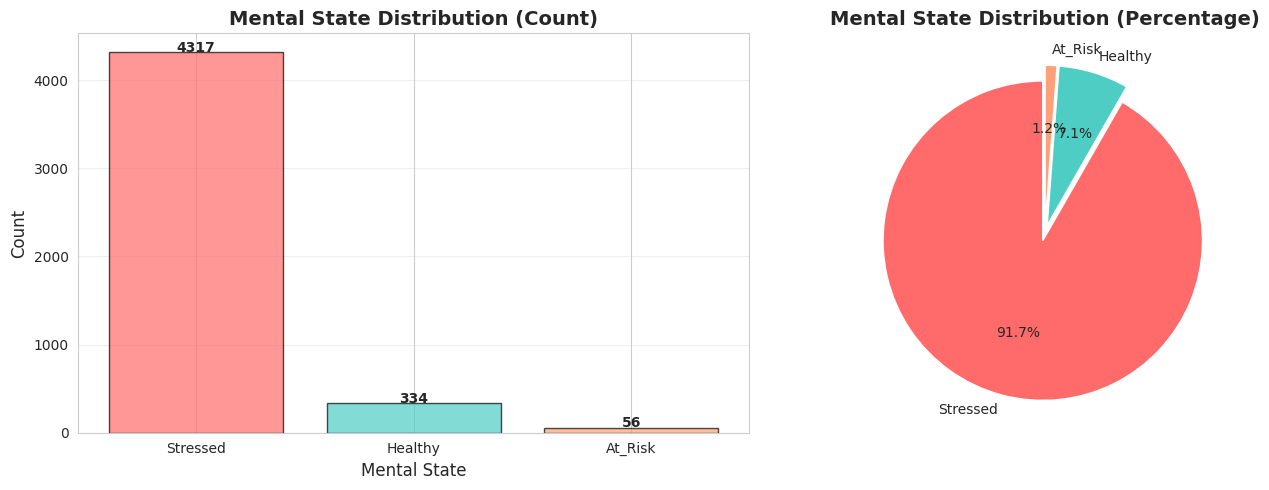

Mental State Distribution:
Stressed: 4317 (91.71%)
Healthy: 334 (7.10%)
At_Risk: 56 (1.19%)


In [12]:
# Analyze the distribution of mental states (target variable)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
mental_state_counts = df_clean['mental_state'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#FFA07A']

axes[0].bar(mental_state_counts.index, mental_state_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_title('Mental State Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mental State', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(mental_state_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(mental_state_counts.values, labels=mental_state_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Mental State Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("Mental State Distribution:")
print("="*80)
for state, count in mental_state_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"{state}: {count} ({percentage:.2f}%)")

### 3.3 Demographic Analysis
Explore the distribution of age, gender, and their relationship with mental state.

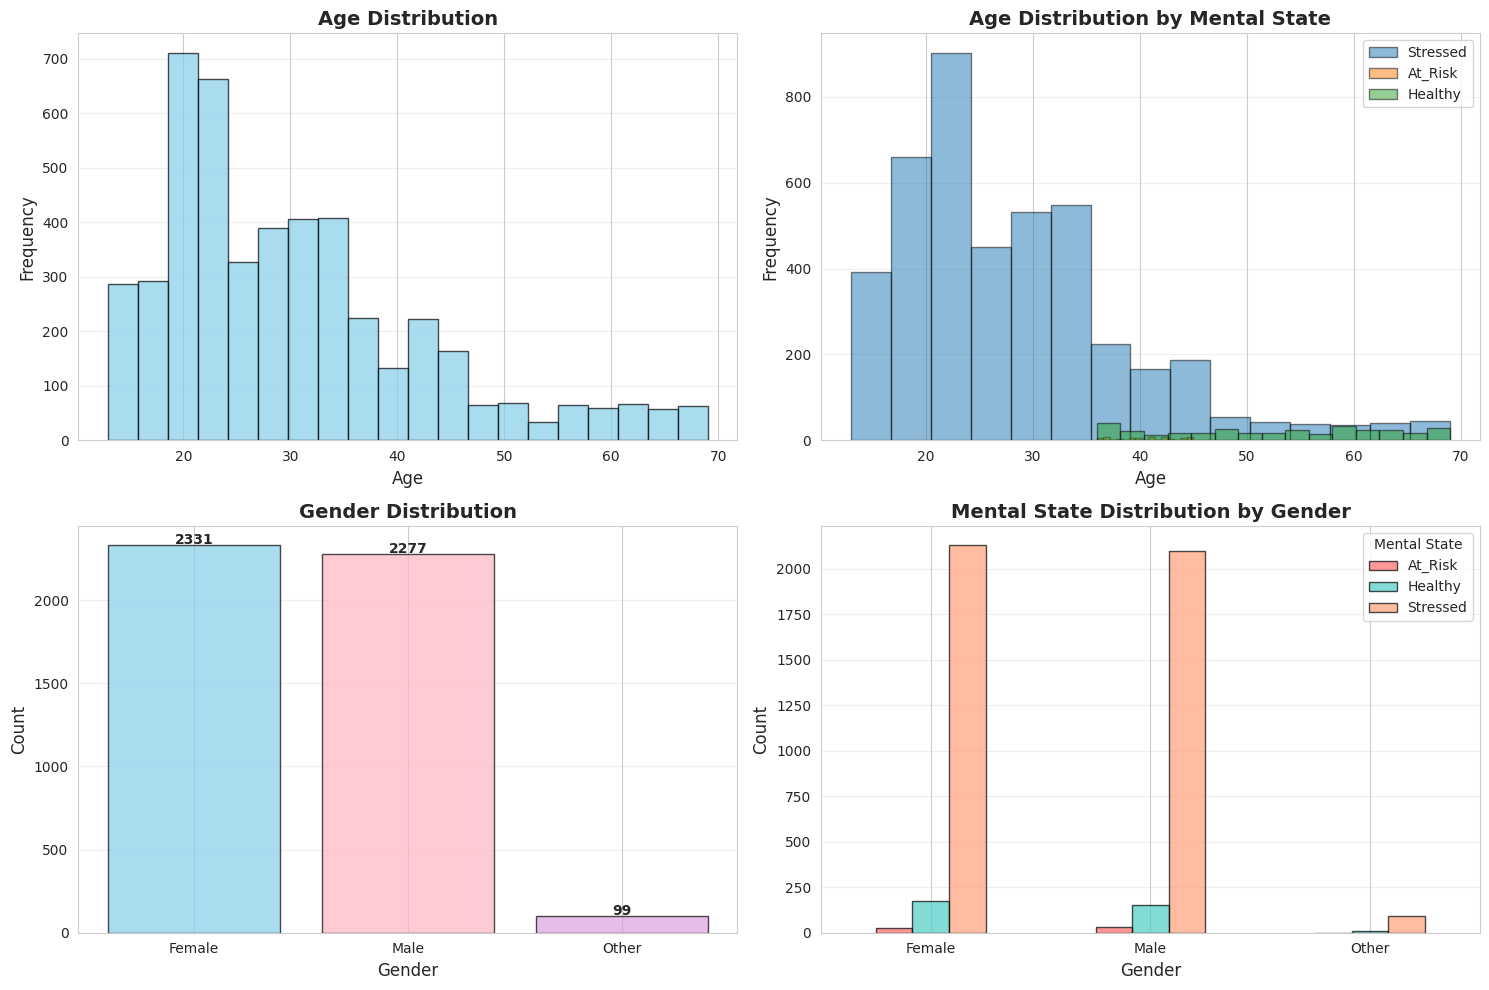


Age Statistics by Mental State:
               count       mean        std   min    25%   50%   75%   max
mental_state                                                             
At_Risk         56.0  40.642857   2.888400  36.0  38.75  41.0  43.0  45.0
Healthy        334.0  52.520958  10.128210  36.0  43.25  53.0  62.0  69.0
Stressed      4317.0  28.333333  10.855882  13.0  21.00  25.0  34.0  69.0


In [13]:
# Age distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution histogram
axes[0, 0].hist(df_clean['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# Age distribution by mental state
for state in df_clean['mental_state'].unique():
    data = df_clean[df_clean['mental_state'] == state]['age']
    axes[0, 1].hist(data, bins=15, alpha=0.5, label=state, edgecolor='black')
axes[0, 1].set_title('Age Distribution by Mental State', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Gender distribution
gender_counts = df_clean['gender'].value_counts()
axes[1, 0].bar(gender_counts.index, gender_counts.values, color=['#87CEEB', '#FFB6C1', '#DDA0DD'], 
               edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Gender', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Add count labels
for i, v in enumerate(gender_counts.values):
    axes[1, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Gender vs Mental State
gender_mental = pd.crosstab(df_clean['gender'], df_clean['mental_state'])
gender_mental.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4', '#FFA07A'], 
                   edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Mental State Distribution by Gender', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gender', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].legend(title='Mental State')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Print age statistics by mental state
print("\nAge Statistics by Mental State:")
print("="*80)
print(df_clean.groupby('mental_state')['age'].describe())

### 3.4 Social Media Platform Analysis
Analyze which platforms are used and their relationship with mental health.

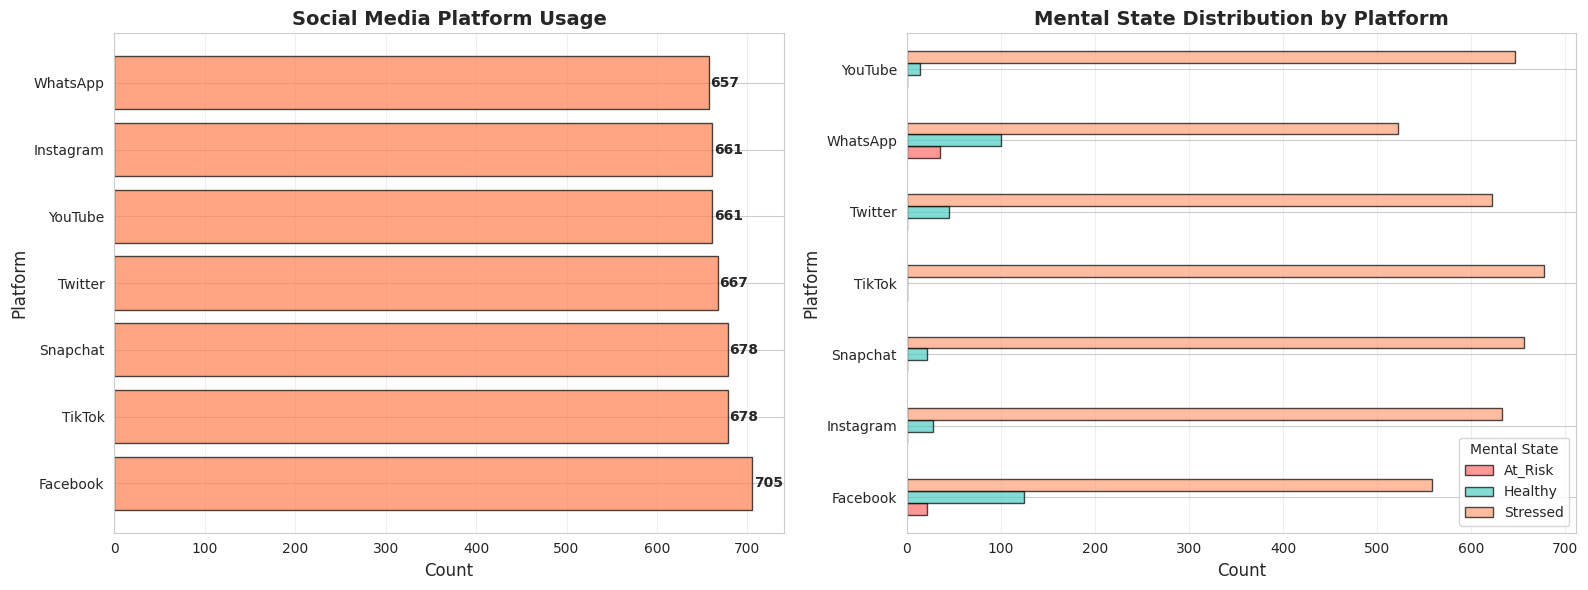


Platform Usage Statistics:
platform
Facebook     705
TikTok       678
Snapchat     678
Twitter      667
YouTube      661
Instagram    661
WhatsApp     657
Name: count, dtype: int64

Mental State by Platform (Percentage):
mental_state  At_Risk  Healthy  Stressed
platform                                
Facebook         2.98    17.73     79.29
Instagram        0.00     4.24     95.76
Snapchat         0.00     3.24     96.76
TikTok           0.00     0.00    100.00
Twitter          0.00     6.75     93.25
WhatsApp         5.33    15.22     79.45
YouTube          0.00     2.12     97.88


In [14]:
# Platform usage analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Platform distribution
platform_counts = df_clean['platform'].value_counts()
axes[0].barh(platform_counts.index, platform_counts.values, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Social Media Platform Usage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Platform', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Add count labels
for i, v in enumerate(platform_counts.values):
    axes[0].text(v + 2, i, str(v), va='center', fontweight='bold')

# Platform vs Mental State
platform_mental = pd.crosstab(df_clean['platform'], df_clean['mental_state'])
platform_mental.plot(kind='barh', ax=axes[1], color=['#FF6B6B', '#4ECDC4', '#FFA07A'], 
                     edgecolor='black', alpha=0.7, stacked=False)
axes[1].set_title('Mental State Distribution by Platform', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Platform', fontsize=12)
axes[1].legend(title='Mental State')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print platform statistics
print("\nPlatform Usage Statistics:")
print("="*80)
print(platform_counts)
print("\n" + "="*80)
print("Mental State by Platform (Percentage):")
print("="*80)
platform_mental_pct = pd.crosstab(df_clean['platform'], df_clean['mental_state'], normalize='index') * 100
print(platform_mental_pct.round(2))

### 3.5 Screen Time and Social Media Usage Analysis
Examine patterns in screen time and social media usage.

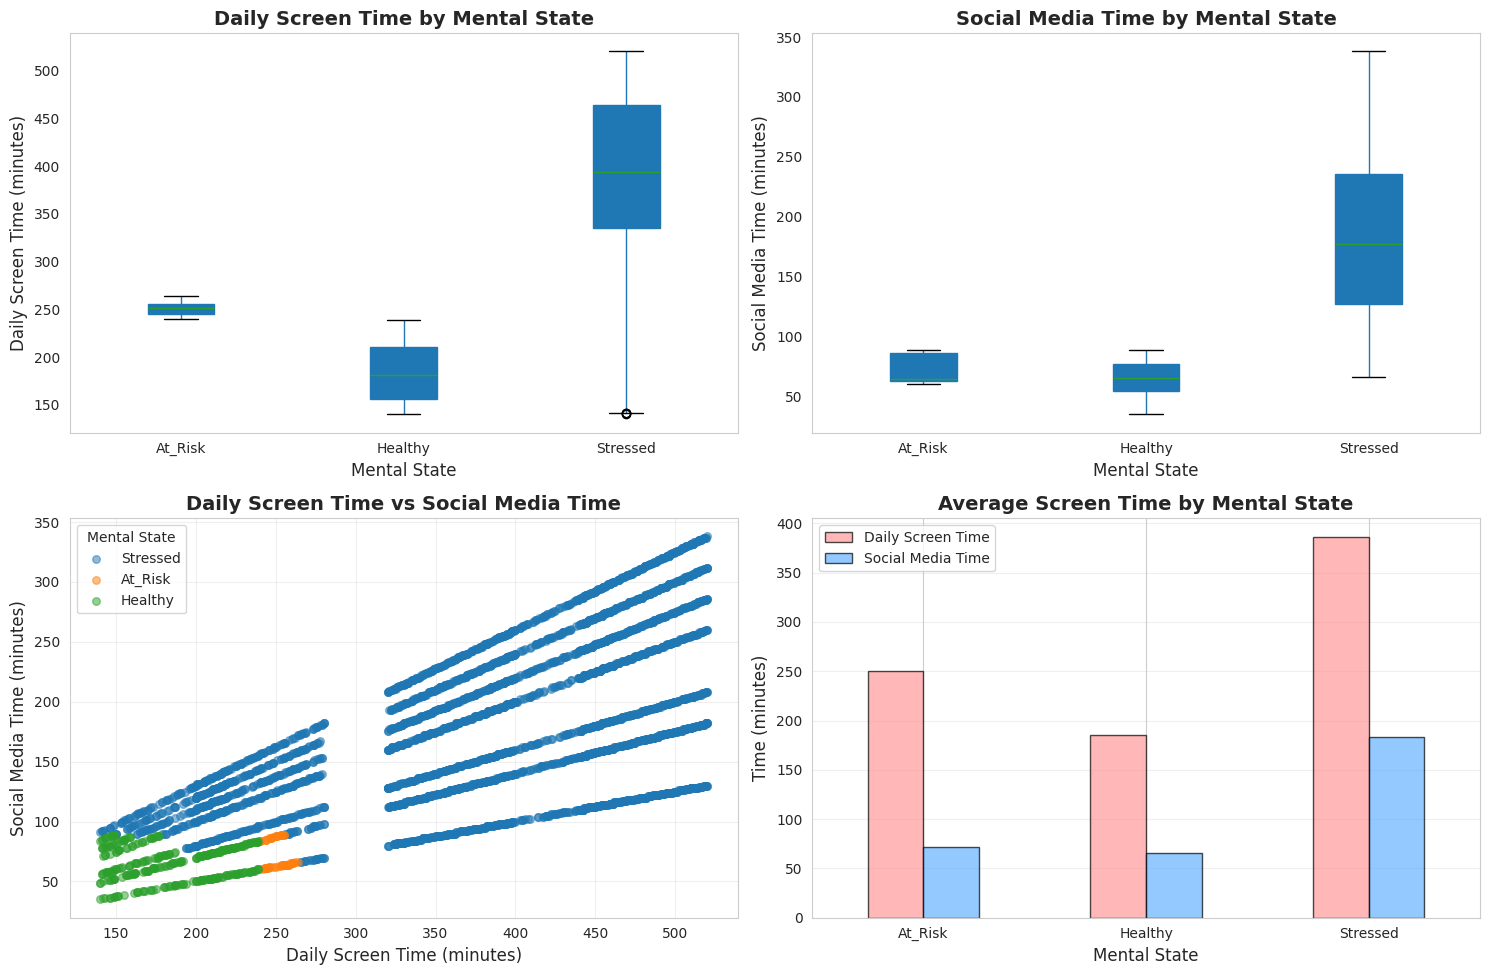


Screen Time Statistics by Mental State:
             daily_screen_time_min                                       \
                             count        mean        std    min    25%   
mental_state                                                              
At_Risk                       56.0  250.732143   6.507314  240.0  245.0   
Healthy                      334.0  185.119760  30.582395  140.0  156.0   
Stressed                    4317.0  385.893213  96.132034  140.0  335.0   

                                   social_media_time_min              \
                50%     75%    max                 count        mean   
mental_state                                                           
At_Risk       251.0  255.25  264.0                  56.0   72.000000   
Healthy       181.0  211.00  239.0                 334.0   65.443114   
Stressed      394.0  464.00  520.0                4317.0  183.657401   

                                                            
              

In [15]:
# Screen time analysis by mental state
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Daily screen time by mental state
df_clean.boxplot(column='daily_screen_time_min', by='mental_state', ax=axes[0, 0], 
                 patch_artist=True, grid=False)
axes[0, 0].set_title('Daily Screen Time by Mental State', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Mental State', fontsize=12)
axes[0, 0].set_ylabel('Daily Screen Time (minutes)', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

# Social media time by mental state
df_clean.boxplot(column='social_media_time_min', by='mental_state', ax=axes[0, 1], 
                 patch_artist=True, grid=False)
axes[0, 1].set_title('Social Media Time by Mental State', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Mental State', fontsize=12)
axes[0, 1].set_ylabel('Social Media Time (minutes)', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Scatter plot: Daily screen time vs Social media time
for state in df_clean['mental_state'].unique():
    data = df_clean[df_clean['mental_state'] == state]
    axes[1, 0].scatter(data['daily_screen_time_min'], data['social_media_time_min'], 
                      label=state, alpha=0.5, s=30)
axes[1, 0].set_title('Daily Screen Time vs Social Media Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Daily Screen Time (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Social Media Time (minutes)', fontsize=12)
axes[1, 0].legend(title='Mental State')
axes[1, 0].grid(alpha=0.3)

# Average screen time comparison
screen_time_avg = df_clean.groupby('mental_state')[['daily_screen_time_min', 'social_media_time_min']].mean()
screen_time_avg.plot(kind='bar', ax=axes[1, 1], color=['#FF9999', '#66B2FF'], 
                     edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Average Screen Time by Mental State', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mental State', fontsize=12)
axes[1, 1].set_ylabel('Time (minutes)', fontsize=12)
axes[1, 1].legend(['Daily Screen Time', 'Social Media Time'])
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

# Print statistics
print("\nScreen Time Statistics by Mental State:")
print("="*80)
print(df_clean.groupby('mental_state')[['daily_screen_time_min', 'social_media_time_min']].describe())

### 3.6 Social Interactions Analysis
Analyze positive and negative interactions patterns.

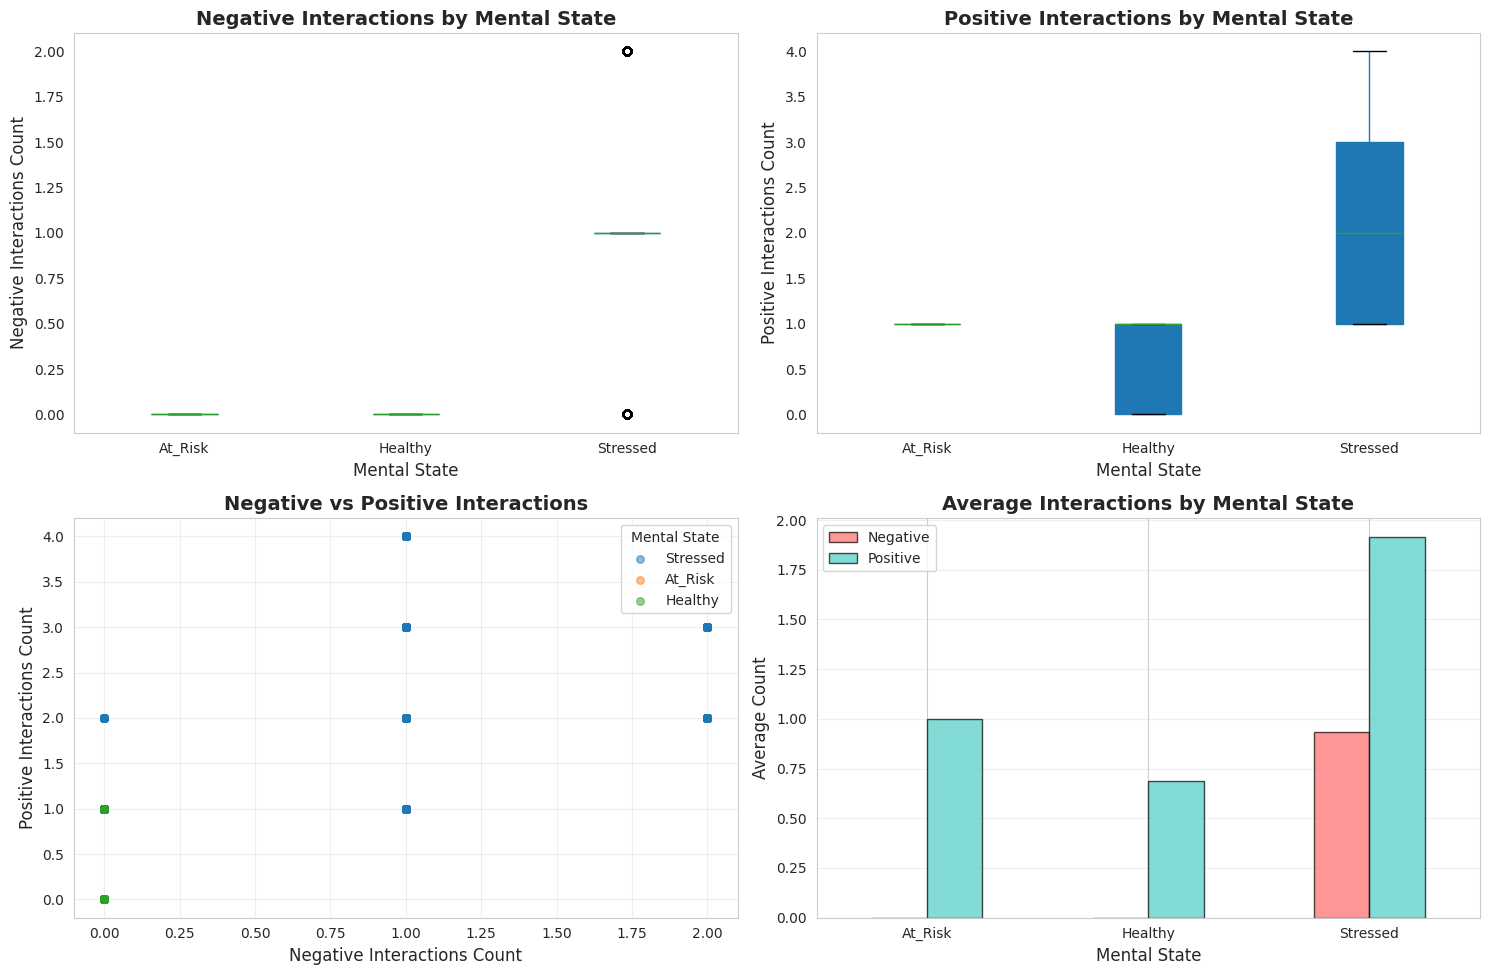


Social Interactions Statistics by Mental State:
             negative_interactions_count                                    \
                                   count     mean       std  min  25%  50%   
mental_state                                                                 
At_Risk                             56.0  0.00000  0.000000  0.0  0.0  0.0   
Healthy                            334.0  0.00000  0.000000  0.0  0.0  0.0   
Stressed                          4317.0  0.93375  0.515077  0.0  1.0  1.0   

                       positive_interactions_count                           \
              75%  max                       count      mean       std  min   
mental_state                                                                  
At_Risk       0.0  0.0                        56.0  1.000000  0.000000  1.0   
Healthy       0.0  0.0                       334.0  0.685629  0.464962  0.0   
Stressed      1.0  2.0                      4317.0  1.913366  0.907644  1.0   

       

In [16]:
# Social interactions analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Negative interactions by mental state
df_clean.boxplot(column='negative_interactions_count', by='mental_state', ax=axes[0, 0],
                 patch_artist=True, grid=False)
axes[0, 0].set_title('Negative Interactions by Mental State', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Mental State', fontsize=12)
axes[0, 0].set_ylabel('Negative Interactions Count', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

# Positive interactions by mental state
df_clean.boxplot(column='positive_interactions_count', by='mental_state', ax=axes[0, 1],
                 patch_artist=True, grid=False)
axes[0, 1].set_title('Positive Interactions by Mental State', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Mental State', fontsize=12)
axes[0, 1].set_ylabel('Positive Interactions Count', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Scatter plot: Negative vs Positive interactions
for state in df_clean['mental_state'].unique():
    data = df_clean[df_clean['mental_state'] == state]
    axes[1, 0].scatter(data['negative_interactions_count'], data['positive_interactions_count'], 
                      label=state, alpha=0.5, s=30)
axes[1, 0].set_title('Negative vs Positive Interactions', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Negative Interactions Count', fontsize=12)
axes[1, 0].set_ylabel('Positive Interactions Count', fontsize=12)
axes[1, 0].legend(title='Mental State')
axes[1, 0].grid(alpha=0.3)

# Average interactions comparison
interactions_avg = df_clean.groupby('mental_state')[['negative_interactions_count', 
                                                       'positive_interactions_count']].mean()
interactions_avg.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'], 
                     edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Average Interactions by Mental State', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mental State', fontsize=12)
axes[1, 1].set_ylabel('Average Count', fontsize=12)
axes[1, 1].legend(['Negative', 'Positive'])
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

# Print statistics
print("\nSocial Interactions Statistics by Mental State:")
print("="*80)
print(df_clean.groupby('mental_state')[['negative_interactions_count', 
                                          'positive_interactions_count']].describe())

### 3.7 Lifestyle Factors Analysis
Explore sleep and physical activity patterns.

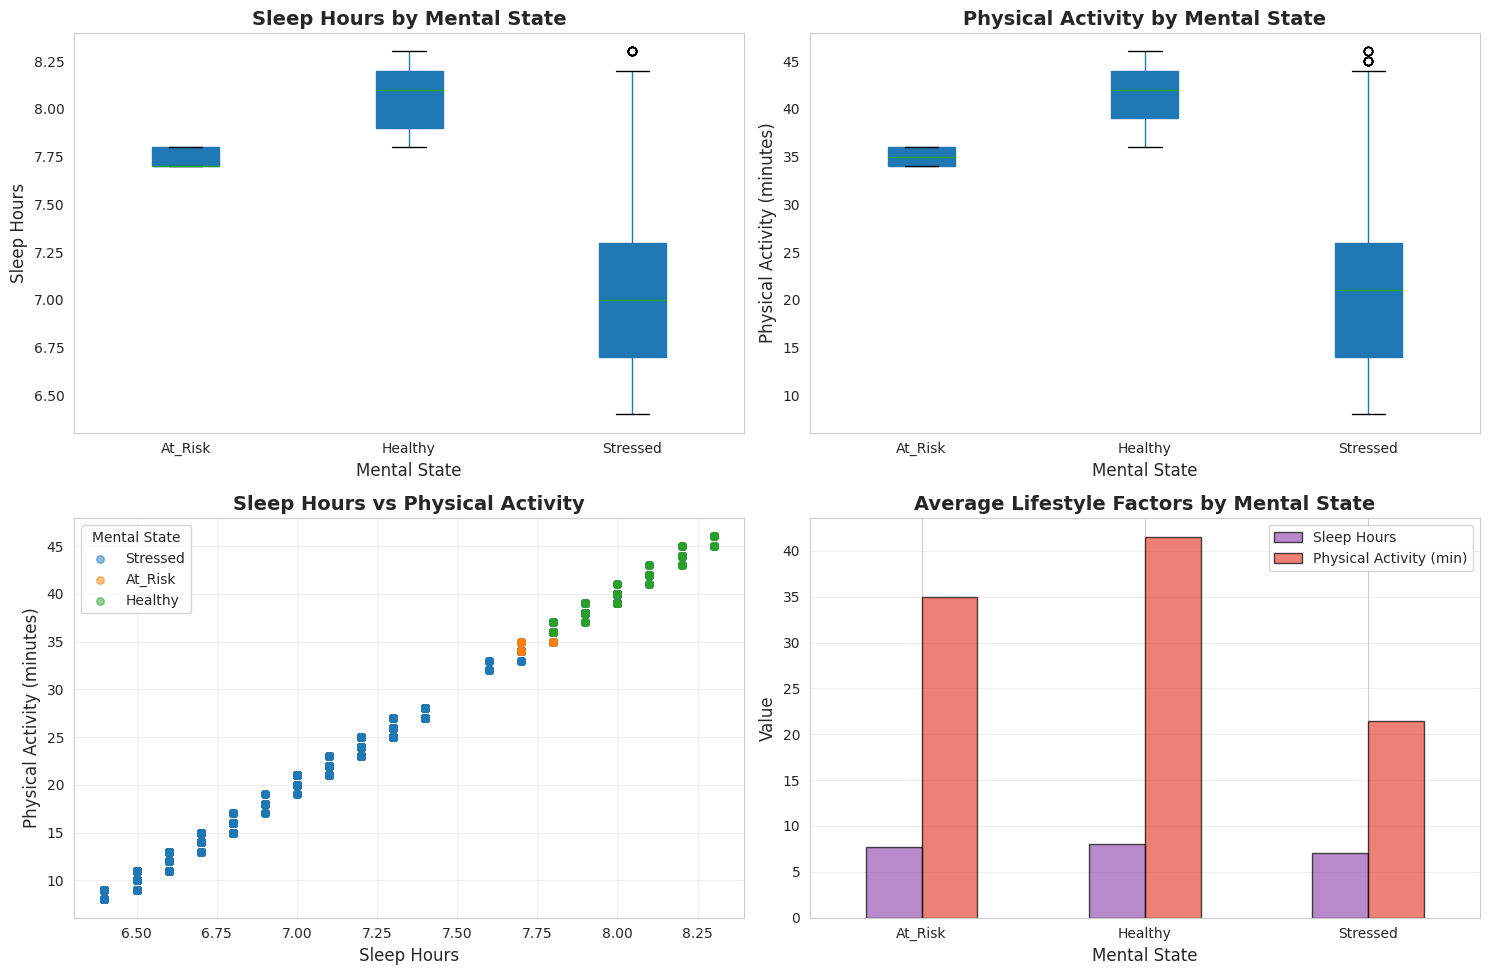


Lifestyle Factors Statistics by Mental State:
             sleep_hours                                               \
                   count      mean       std  min  25%  50%  75%  max   
mental_state                                                            
At_Risk             56.0  7.748214  0.050420  7.7  7.7  7.7  7.8  7.8   
Healthy            334.0  8.077844  0.158219  7.8  7.9  8.1  8.2  8.3   
Stressed          4317.0  7.070141  0.483764  6.4  6.7  7.0  7.3  8.3   

             physical_activity_min                                         \
                             count       mean       std   min   25%   50%   
mental_state                                                                
At_Risk                       56.0  34.946429  0.772708  34.0  34.0  35.0   
Healthy                      334.0  41.488024  3.081209  36.0  39.0  42.0   
Stressed                    4317.0  21.408385  9.615512   8.0  14.0  21.0   

                          
               75%   max

In [17]:
# Lifestyle factors analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sleep hours by mental state
df_clean.boxplot(column='sleep_hours', by='mental_state', ax=axes[0, 0],
                 patch_artist=True, grid=False)
axes[0, 0].set_title('Sleep Hours by Mental State', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Mental State', fontsize=12)
axes[0, 0].set_ylabel('Sleep Hours', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

# Physical activity by mental state
df_clean.boxplot(column='physical_activity_min', by='mental_state', ax=axes[0, 1],
                 patch_artist=True, grid=False)
axes[0, 1].set_title('Physical Activity by Mental State', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Mental State', fontsize=12)
axes[0, 1].set_ylabel('Physical Activity (minutes)', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Scatter plot: Sleep vs Physical Activity
for state in df_clean['mental_state'].unique():
    data = df_clean[df_clean['mental_state'] == state]
    axes[1, 0].scatter(data['sleep_hours'], data['physical_activity_min'], 
                      label=state, alpha=0.5, s=30)
axes[1, 0].set_title('Sleep Hours vs Physical Activity', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sleep Hours', fontsize=12)
axes[1, 0].set_ylabel('Physical Activity (minutes)', fontsize=12)
axes[1, 0].legend(title='Mental State')
axes[1, 0].grid(alpha=0.3)

# Average lifestyle factors comparison
lifestyle_avg = df_clean.groupby('mental_state')[['sleep_hours', 'physical_activity_min']].mean()
lifestyle_avg.plot(kind='bar', ax=axes[1, 1], color=['#9B59B6', '#E74C3C'], 
                  edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Average Lifestyle Factors by Mental State', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mental State', fontsize=12)
axes[1, 1].set_ylabel('Value', fontsize=12)
axes[1, 1].legend(['Sleep Hours', 'Physical Activity (min)'])
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

# Print statistics
print("\nLifestyle Factors Statistics by Mental State:")
print("="*80)
print(df_clean.groupby('mental_state')[['sleep_hours', 'physical_activity_min']].describe())

### 3.8 Psychological Metrics Analysis
Analyze anxiety level, stress level, and mood level.

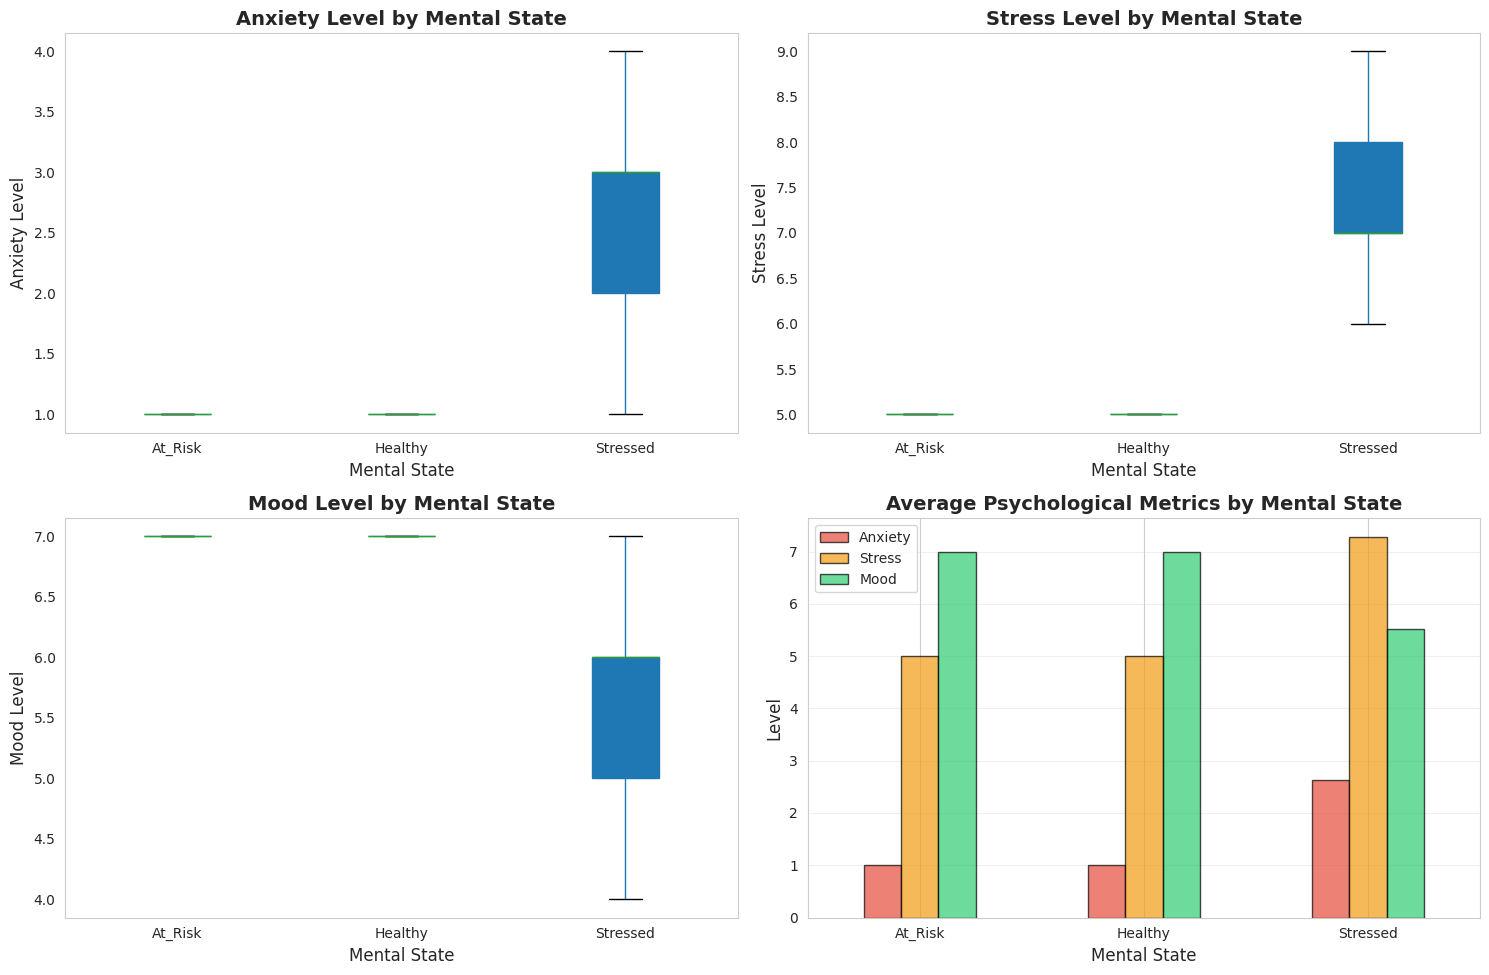


Psychological Metrics Statistics by Mental State:
             anxiety_level                                               \
                     count      mean       std  min  25%  50%  75%  max   
mental_state                                                              
At_Risk               56.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Healthy              334.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Stressed            4317.0  2.631689  0.685543  1.0  2.0  3.0  3.0  4.0   

             stress_level            ...           mood_level            \
                    count      mean  ...  75%  max      count      mean   
mental_state                         ...                                  
At_Risk              56.0  5.000000  ...  5.0  5.0       56.0  7.000000   
Healthy             334.0  5.000000  ...  5.0  5.0      334.0  7.000000   
Stressed           4317.0  7.271253  ...  8.0  9.0     4317.0  5.516331   

                                               

In [18]:
# Psychological metrics analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Anxiety level by mental state
df_clean.boxplot(column='anxiety_level', by='mental_state', ax=axes[0, 0],
                 patch_artist=True, grid=False)
axes[0, 0].set_title('Anxiety Level by Mental State', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Mental State', fontsize=12)
axes[0, 0].set_ylabel('Anxiety Level', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

# Stress level by mental state
df_clean.boxplot(column='stress_level', by='mental_state', ax=axes[0, 1],
                 patch_artist=True, grid=False)
axes[0, 1].set_title('Stress Level by Mental State', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Mental State', fontsize=12)
axes[0, 1].set_ylabel('Stress Level', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Mood level by mental state
df_clean.boxplot(column='mood_level', by='mental_state', ax=axes[1, 0],
                 patch_artist=True, grid=False)
axes[1, 0].set_title('Mood Level by Mental State', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Mental State', fontsize=12)
axes[1, 0].set_ylabel('Mood Level', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Average psychological metrics comparison
psych_avg = df_clean.groupby('mental_state')[['anxiety_level', 'stress_level', 'mood_level']].mean()
psych_avg.plot(kind='bar', ax=axes[1, 1], color=['#E74C3C', '#F39C12', '#2ECC71'], 
              edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Average Psychological Metrics by Mental State', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mental State', fontsize=12)
axes[1, 1].set_ylabel('Level', fontsize=12)
axes[1, 1].legend(['Anxiety', 'Stress', 'Mood'])
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

# Print statistics
print("\nPsychological Metrics Statistics by Mental State:")
print("="*80)
print(df_clean.groupby('mental_state')[['anxiety_level', 'stress_level', 'mood_level']].describe())

### 3.9 Correlation Analysis
Examine correlations between numerical features.

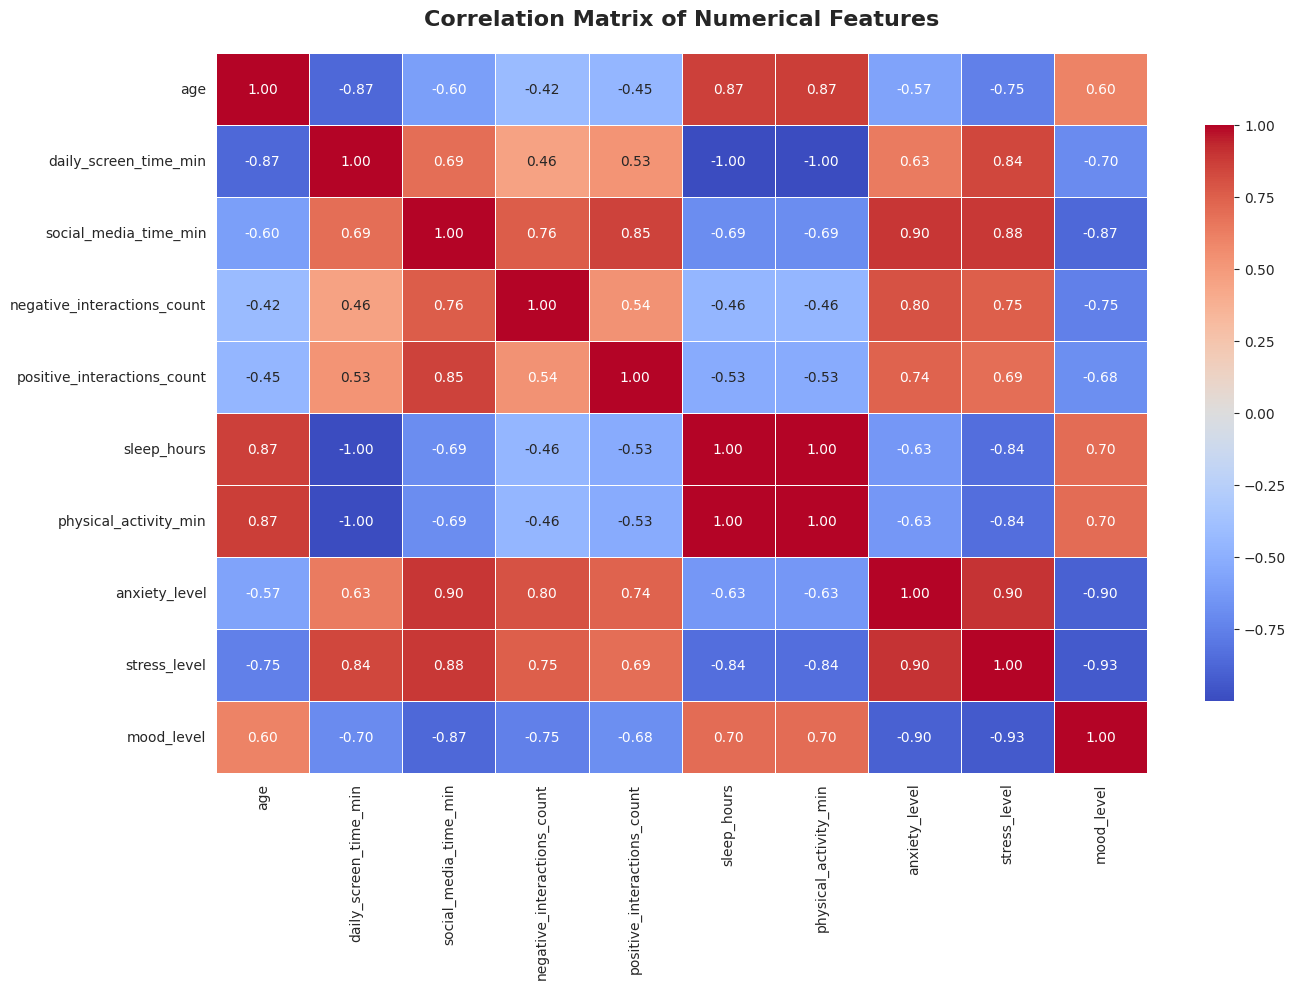


Highly Correlated Features (|correlation| > 0.5):
                  Feature 1                   Feature 2  Correlation
      daily_screen_time_min       physical_activity_min    -0.999632
      daily_screen_time_min                 sleep_hours    -0.998564
                sleep_hours       physical_activity_min     0.998066
               stress_level                  mood_level    -0.934872
              anxiety_level                  mood_level    -0.903884
              anxiety_level                stress_level     0.900174
      social_media_time_min               anxiety_level     0.896858
      social_media_time_min                stress_level     0.884112
                        age       daily_screen_time_min    -0.868348
      social_media_time_min                  mood_level    -0.867485
                        age       physical_activity_min     0.867476
                        age                 sleep_hours     0.865522
      social_media_time_min positive_interactions_co

In [19]:
# Calculate correlation matrix for numerical features
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_clean[numerical_features].corr()

# Create a large heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print highly correlated features (absolute correlation > 0.5, excluding self-correlation)
print("\nHighly Correlated Features (|correlation| > 0.5):")
print("="*80)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.to_string(index=False))
else:
    print("No pairs with |correlation| > 0.5 found.")

### 3.10 Feature Distribution Analysis
Examine the distribution of all numerical features.

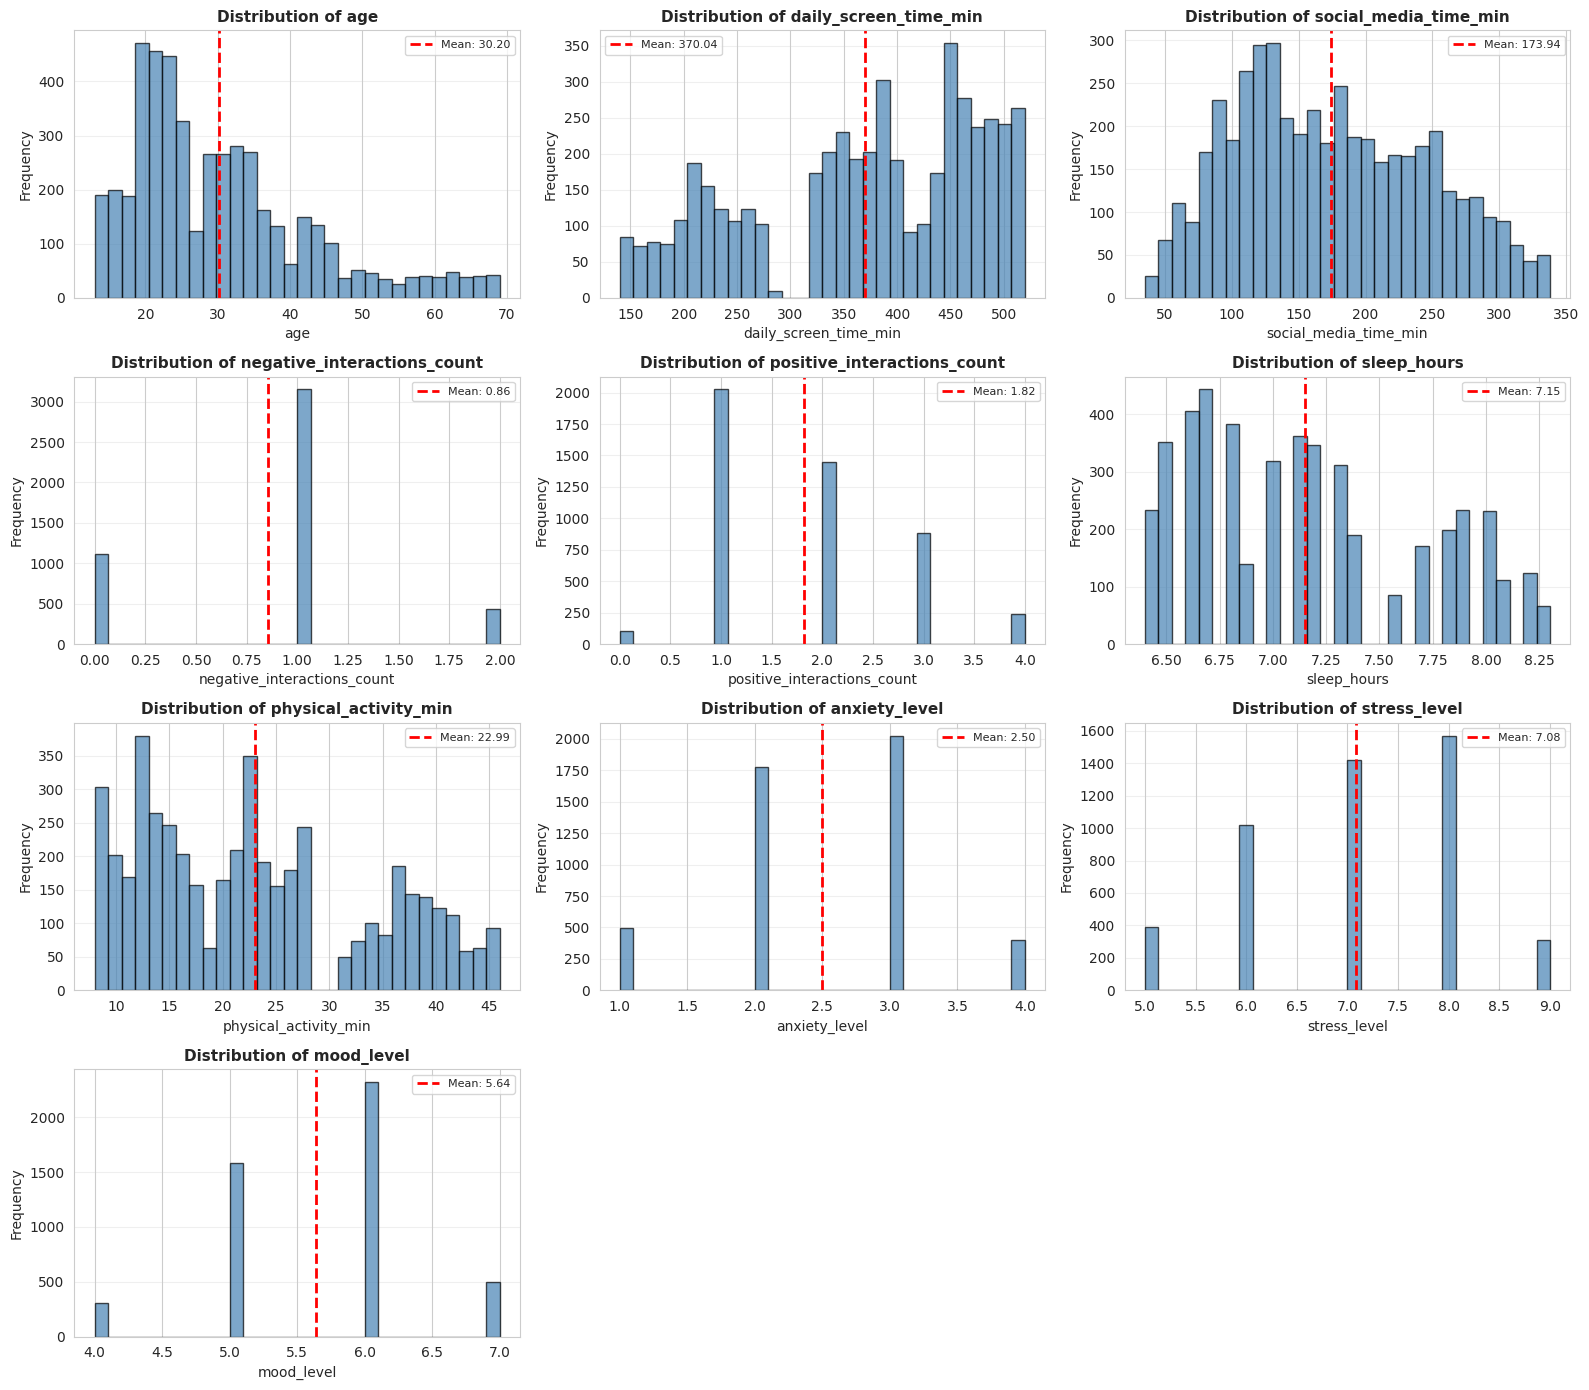


Skewness of Numerical Features:
age: 1.108 (Right-skewed)
positive_interactions_count: 0.584 (Right-skewed)
physical_activity_min: 0.496 (Right-skewed)
sleep_hours: 0.490 (Right-skewed)
social_media_time_min: 0.282 (Right-skewed)
negative_interactions_count: -0.042 (Left-skewed)
anxiety_level: -0.107 (Left-skewed)
mood_level: -0.200 (Left-skewed)
stress_level: -0.251 (Left-skewed)
daily_screen_time_min: -0.498 (Left-skewed)


In [20]:
# Plot distributions of all numerical features
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Histogram
    axes[idx].hist(df_clean[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df_clean[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].legend(fontsize=8)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Print skewness for each numerical feature
print("\nSkewness of Numerical Features:")
print("="*80)
skewness = df_clean[numerical_features].skew().sort_values(ascending=False)
for feature, skew_value in skewness.items():
    skew_type = "Right-skewed" if skew_value > 0 else "Left-skewed" if skew_value < 0 else "Symmetric"
    print(f"{feature}: {skew_value:.3f} ({skew_type})")

### 3.11 Key Insights Summary

In [21]:
# Generate comprehensive summary statistics grouped by mental state
print("="*80)
print("COMPREHENSIVE EDA SUMMARY")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print("-" * 80)
print(f"Total Records: {len(df_clean)}")
print(f"Total Features: {len(df_clean.columns)}")
print(f"Numerical Features: {len(numerical_features)}")
print(f"Categorical Features: {len(df_clean.select_dtypes(include=['object']).columns)}")

print("\n2. MENTAL STATE DISTRIBUTION:")
print("-" * 80)
for state, count in df_clean['mental_state'].value_counts().items():
    percentage = (count / len(df_clean)) * 100
    print(f"  {state}: {count} records ({percentage:.2f}%)")

print("\n3. KEY OBSERVATIONS BY MENTAL STATE:")
print("-" * 80)

# Average values by mental state
mental_state_summary = df_clean.groupby('mental_state')[numerical_features].mean()
print("\nAverage Values:")
print(mental_state_summary.round(2))

print("\n4. MOST DISTINCTIVE FEATURES:")
print("-" * 80)
# Calculate coefficient of variation for each feature across mental states
cv_scores = {}
for col in numerical_features:
    grouped = df_clean.groupby('mental_state')[col].mean()
    cv = grouped.std() / grouped.mean() if grouped.mean() != 0 else 0
    cv_scores[col] = abs(cv)

sorted_features = sorted(cv_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 features with highest variation across mental states:")
for feature, score in sorted_features:
    print(f"  • {feature}: CV = {score:.3f}")

print("\n" + "="*80)
print("✓ Exploratory Data Analysis completed successfully!")
print("="*80)

COMPREHENSIVE EDA SUMMARY

1. DATASET OVERVIEW:
--------------------------------------------------------------------------------
Total Records: 4707
Total Features: 13
Numerical Features: 10
Categorical Features: 3

2. MENTAL STATE DISTRIBUTION:
--------------------------------------------------------------------------------
  Stressed: 4317 records (91.71%)
  Healthy: 334 records (7.10%)
  At_Risk: 56 records (1.19%)

3. KEY OBSERVATIONS BY MENTAL STATE:
--------------------------------------------------------------------------------

Average Values:
                age  daily_screen_time_min  social_media_time_min  \
mental_state                                                        
At_Risk       40.64                 250.73                  72.00   
Healthy       52.52                 185.12                  65.44   
Stressed      28.33                 385.89                 183.66   

              negative_interactions_count  positive_interactions_count  \
mental_state          

---

## 4. Feature Engineering

Feature engineering is the process of creating new features from existing ones to help our model better predict mental health states. We'll create simple, interpretable features that combine related variables in meaningful ways.

In this section, we will:
1. Create ratio-based features (proportions and balances)
2. Create composite scores (combining related metrics)
3. Create binary flags (identifying risk conditions)

These new features will help the model identify patterns more easily.

### 4.1 Create a Copy for Feature Engineering
Create a working copy of the cleaned dataset to preserve the original data.

In [22]:
# Create a copy of the cleaned dataset for feature engineering
df_features = df_clean.copy()

print("="*80)
print("FEATURE ENGINEERING INITIALIZATION")
print("="*80)
print(f"Starting with {df_features.shape[0]} rows and {df_features.shape[1]} columns")
print(f"\nOriginal Features: {df_features.columns.tolist()}")

FEATURE ENGINEERING INITIALIZATION
Starting with 4707 rows and 13 columns

Original Features: ['age', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']


### 4.2 Ratio-Based Features
Create simple ratio features that show proportions and balances between related variables.

**Why these features?**
- **Social Media Ratio**: Shows how much of screen time is spent on social media (0 to 1)
- **Interaction Balance**: Compares positive to negative interactions (higher = more positive)
- **Net Interactions**: Simple difference between positive and negative interactions

In [23]:
# 1. Social Media Ratio
# What proportion of total screen time is spent on social media?
df_features['social_media_ratio'] = df_features['social_media_time_min'] / df_features['daily_screen_time_min']

# 2. Interaction Balance
# Ratio of positive to negative interactions (add 1 to avoid division by zero)
df_features['interaction_balance'] = (df_features['positive_interactions_count'] + 1) / (df_features['negative_interactions_count'] + 1)

# 3. Net Interactions
# Difference between positive and negative interactions
df_features['net_interactions'] = df_features['positive_interactions_count'] - df_features['negative_interactions_count']

# Display summary
print("="*80)
print("RATIO FEATURES CREATED")
print("="*80)
print("\nNew Features (3):")
print("  1. social_media_ratio: Proportion of screen time on social media")
print("  2. interaction_balance: Positive/Negative interaction ratio")
print("  3. net_interactions: Positive - Negative interactions")

print("\n" + "-"*80)
print("Statistics:")
print("-"*80)
ratio_features = ['social_media_ratio', 'interaction_balance', 'net_interactions']
print(df_features[ratio_features].describe().round(2))

RATIO FEATURES CREATED

New Features (3):
  1. social_media_ratio: Proportion of screen time on social media
  2. interaction_balance: Positive/Negative interaction ratio
  3. net_interactions: Positive - Negative interactions

--------------------------------------------------------------------------------
Statistics:
--------------------------------------------------------------------------------
       social_media_ratio  interaction_balance  net_interactions
count             4707.00              4707.00           4707.00
mean                 0.47                 1.58              0.96
std                  0.13                 0.47              0.79
min                  0.25                 1.00              0.00
25%                  0.35                 1.00              0.00
50%                  0.50                 1.50              1.00
75%                  0.60                 2.00              1.00
max                  0.65                 3.00              3.00


### 4.3 Composite Health Scores
Combine multiple related features into single scores that are easier for the model to interpret.

**Why these scores?**
- **Psychological Distress**: Combines anxiety, stress, and mood into one mental health metric
- **Lifestyle Health**: Combines sleep and physical activity into a wellness score

In [24]:
# 1. Psychological Distress Score
# Combine anxiety, stress, and mood (inverted) into one score
# Higher score = worse mental health
# Range: 0-10 (average of three components)
df_features['psychological_distress'] = (
    df_features['anxiety_level'] + 
    df_features['stress_level'] + 
    (10 - df_features['mood_level'])
) / 3

# 2. Lifestyle Health Score
# Combine sleep and physical activity
# Sleep: optimal is 7-9 hours
# Activity: more is better
# Scale to 0-100
optimal_sleep = 8
max_activity = df_features['physical_activity_min'].max()

# Sleep score: peak at 8 hours, decreases as you move away
sleep_score = 100 - (abs(df_features['sleep_hours'] - optimal_sleep) / optimal_sleep * 100)
sleep_score = sleep_score.clip(0, 100)

# Activity score: higher activity = higher score
activity_score = (df_features['physical_activity_min'] / max_activity * 100)

# Average of both
df_features['lifestyle_health_score'] = (sleep_score + activity_score) / 2

# Display summary
print("="*80)
print("COMPOSITE SCORES CREATED")
print("="*80)
print("\nNew Features (2):")
print("  1. psychological_distress: Combined anxiety, stress, and mood (0-10)")
print("  2. lifestyle_health_score: Combined sleep and activity health (0-100)")

print("\n" + "-"*80)
print("Statistics:")
print("-"*80)
composite_features = ['psychological_distress', 'lifestyle_health_score']
print(df_features[composite_features].describe().round(2))

COMPOSITE SCORES CREATED

New Features (2):
  1. psychological_distress: Combined anxiety, stress, and mood (0-10)
  2. lifestyle_health_score: Combined sleep and activity health (0-100)

--------------------------------------------------------------------------------
Statistics:
--------------------------------------------------------------------------------
       psychological_distress  lifestyle_health_score
count                 4707.00                 4707.00
mean                     4.65                   69.53
std                      0.85                   14.65
min                      3.00                   48.70
25%                      4.00                   57.09
50%                      4.67                   67.20
75%                      5.33                   82.28
max                      6.33                   98.12


### 4.4 Binary Risk Flags
Create simple yes/no flags to identify users at risk based on specific thresholds.

**Why these flags?**
- Easy to interpret (1 = risk present, 0 = no risk)
- Help identify users who exceed unhealthy thresholds
- Useful for model to identify high-risk combinations

In [25]:
# 1. Excessive Screen Time (> 6 hours/day)
df_features['excessive_screen_time'] = (df_features['daily_screen_time_min'] > 360).astype(int)

# 2. Poor Sleep (< 6 hours/night)
df_features['poor_sleep'] = (df_features['sleep_hours'] < 6).astype(int)

# 3. Low Physical Activity (< 30 minutes/day)
df_features['low_activity'] = (df_features['physical_activity_min'] < 30).astype(int)

# 4. High Stress (stress level > 7)
df_features['high_stress'] = (df_features['stress_level'] > 7).astype(int)

# 5. Negative Interactions Dominant (more negative than positive)
df_features['negative_dominant'] = (
    df_features['negative_interactions_count'] > df_features['positive_interactions_count']
).astype(int)

# Display summary
print("="*80)
print("BINARY RISK FLAGS CREATED")
print("="*80)
print("\nNew Features (5):")
print("  1. excessive_screen_time: Screen time > 6 hours/day")
print("  2. poor_sleep: Sleep < 6 hours/night")
print("  3. low_activity: Physical activity < 30 min/day")
print("  4. high_stress: Stress level > 7")
print("  5. negative_dominant: More negative than positive interactions")

binary_features = ['excessive_screen_time', 'poor_sleep', 'low_activity', 
                   'high_stress', 'negative_dominant']

print("\n" + "-"*80)
print("Risk Flags Summary:")
print("-"*80)
for feature in binary_features:
    count = df_features[feature].sum()
    percentage = (count / len(df_features)) * 100
    print(f"  {feature}: {count} users ({percentage:.1f}%)")

BINARY RISK FLAGS CREATED

New Features (5):
  1. excessive_screen_time: Screen time > 6 hours/day
  2. poor_sleep: Sleep < 6 hours/night
  3. low_activity: Physical activity < 30 min/day
  4. high_stress: Stress level > 7
  5. negative_dominant: More negative than positive interactions

--------------------------------------------------------------------------------
Risk Flags Summary:
--------------------------------------------------------------------------------
  excessive_screen_time: 2796 users (59.4%)
  poor_sleep: 0 users (0.0%)
  low_activity: 3483 users (74.0%)
  high_stress: 1879 users (39.9%)
  negative_dominant: 0 users (0.0%)


### 4.5 Feature Engineering Summary
Review all engineered features and their statistics.

In [26]:
# Display comprehensive summary
print("="*80)
print("FEATURE ENGINEERING COMPLETE")
print("="*80)

original_features = df_clean.columns.tolist()
all_features = df_features.columns.tolist()
engineered_features = [f for f in all_features if f not in original_features]

print(f"\nOriginal Features: {len(original_features)}")
print(f"New Engineered Features: {len(engineered_features)}")
print(f"Total Features: {len(all_features)}")

print("\n" + "-"*80)
print("Engineered Features Summary:")
print("-"*80)
print("\n1. Ratio Features (3):")
print("   - social_media_ratio")
print("   - interaction_balance")
print("   - net_interactions")

print("\n2. Composite Scores (2):")
print("   - psychological_distress")
print("   - lifestyle_health_score")

print("\n3. Binary Risk Flags (5):")
print("   - excessive_screen_time")
print("   - poor_sleep")
print("   - low_activity")
print("   - high_stress")
print("   - negative_dominant")

print("\n" + "="*80)
print("Dataset Shape: {} rows × {} columns".format(df_features.shape[0], df_features.shape[1]))
print("Missing Values: {}".format(df_features.isnull().sum().sum()))
print("="*80)

# Show sample of data with new features
print("\nSample Data with Engineered Features:")
print("-"*80)
sample_cols = ['mental_state', 'psychological_distress', 'lifestyle_health_score',
               'social_media_ratio', 'interaction_balance', 'high_stress']
print(df_features[sample_cols].head(10))

FEATURE ENGINEERING COMPLETE

Original Features: 13
New Engineered Features: 10
Total Features: 23

--------------------------------------------------------------------------------
Engineered Features Summary:
--------------------------------------------------------------------------------

1. Ratio Features (3):
   - social_media_ratio
   - interaction_balance
   - net_interactions

2. Composite Scores (2):
   - psychological_distress
   - lifestyle_health_score

3. Binary Risk Flags (5):
   - excessive_screen_time
   - poor_sleep
   - low_activity
   - high_stress
   - negative_dominant

Dataset Shape: 4707 rows × 23 columns
Missing Values: 0

Sample Data with Engineered Features:
--------------------------------------------------------------------------------
  mental_state  psychological_distress  lifestyle_health_score  \
0     Stressed                5.333333               48.695652   
1     Stressed                5.333333               48.695652   
2     Stressed               

### 4.6 Visualize Engineered Features
Visualize the key engineered features to see how they relate to mental health states.

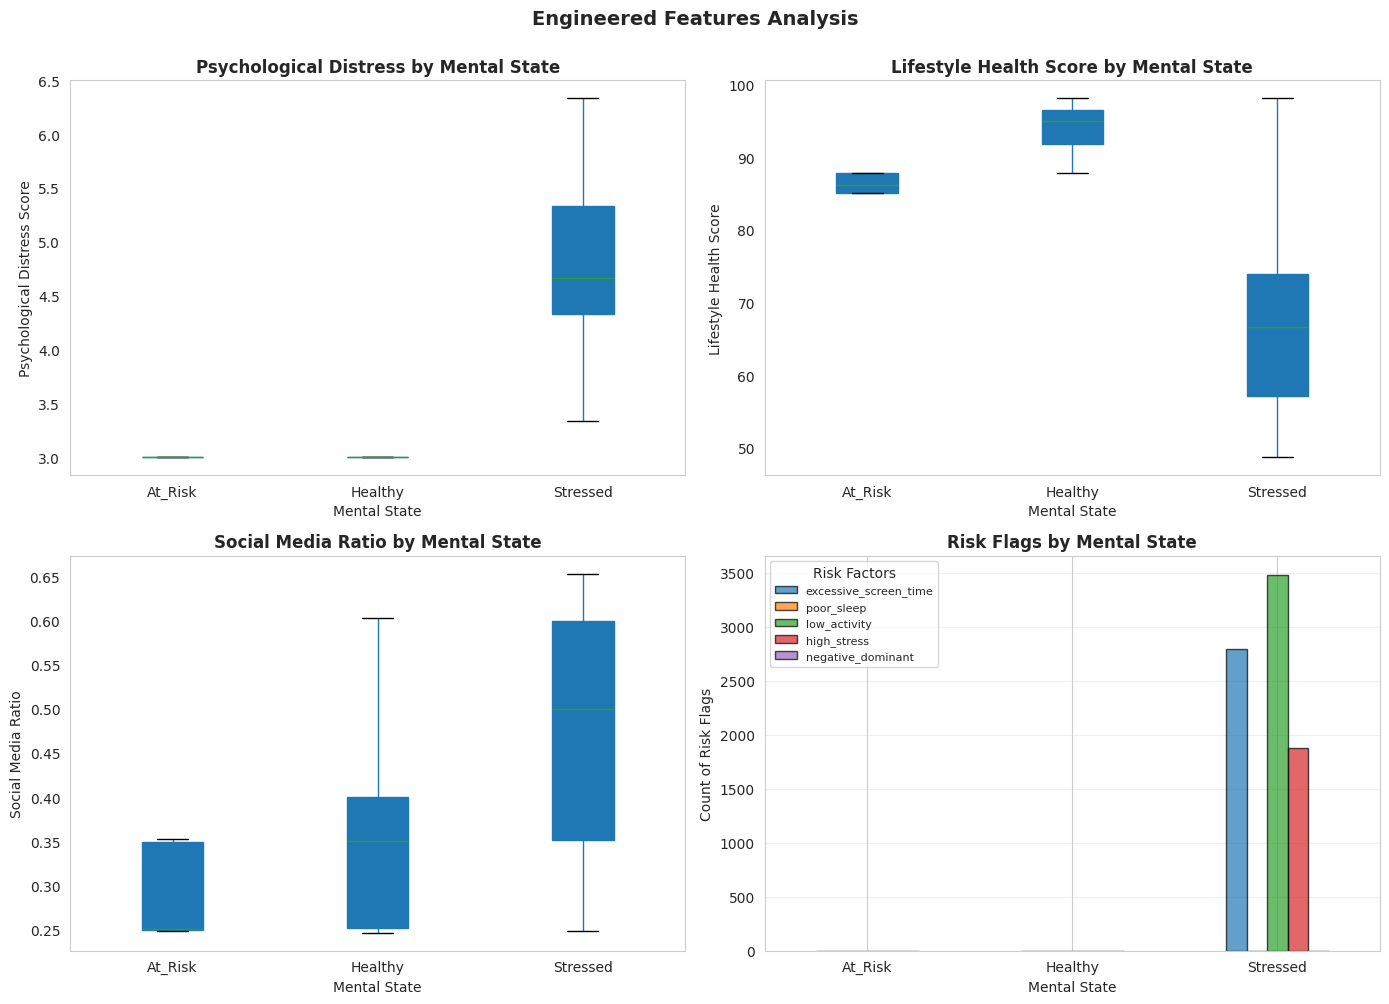


ENGINEERED FEATURES BY MENTAL STATE
              psychological_distress  lifestyle_health_score  \
mental_state                                                   
At_Risk                          3.0                   86.41   
Healthy                          3.0                   94.18   
Stressed                         4.8                   67.40   

              social_media_ratio  interaction_balance  
mental_state                                           
At_Risk                     0.29                 2.00  
Healthy                     0.36                 1.69  
Stressed                    0.48                 1.57  


In [27]:
# Create visualizations for key engineered features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Psychological Distress by Mental State
df_features.boxplot(column='psychological_distress', by='mental_state', ax=axes[0, 0],
                    patch_artist=True, grid=False)
axes[0, 0].set_title('Psychological Distress by Mental State', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Mental State', fontsize=10)
axes[0, 0].set_ylabel('Psychological Distress Score', fontsize=10)
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

# 2. Lifestyle Health Score by Mental State
df_features.boxplot(column='lifestyle_health_score', by='mental_state', ax=axes[0, 1],
                    patch_artist=True, grid=False)
axes[0, 1].set_title('Lifestyle Health Score by Mental State', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Mental State', fontsize=10)
axes[0, 1].set_ylabel('Lifestyle Health Score', fontsize=10)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# 3. Social Media Ratio by Mental State
df_features.boxplot(column='social_media_ratio', by='mental_state', ax=axes[1, 0],
                    patch_artist=True, grid=False)
axes[1, 0].set_title('Social Media Ratio by Mental State', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Mental State', fontsize=10)
axes[1, 0].set_ylabel('Social Media Ratio', fontsize=10)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# 4. Risk Flags by Mental State
risk_by_mental = df_features.groupby('mental_state')[binary_features].sum()
risk_by_mental.plot(kind='bar', ax=axes[1, 1], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Risk Flags by Mental State', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Mental State', fontsize=10)
axes[1, 1].set_ylabel('Count of Risk Flags', fontsize=10)
axes[1, 1].legend(title='Risk Factors', fontsize=8, loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.suptitle('Engineered Features Analysis', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print statistical comparison
print("\n" + "="*80)
print("ENGINEERED FEATURES BY MENTAL STATE")
print("="*80)
key_features = ['psychological_distress', 'lifestyle_health_score', 
                'social_media_ratio', 'interaction_balance']
print(df_features.groupby('mental_state')[key_features].mean().round(2))

---

## 5. Model Development

In this section, we will build machine learning models to predict mental health states based on the features we've analyzed and engineered. We'll follow these steps:

1. **Data Preparation**: Encode categorical variables and prepare features
2. **Train-Test Split**: Split data into training and testing sets
3. **Model Training**: Train multiple classification models
4. **Hyperparameter Tuning**: Optimize model parameters for better performance
5. **Model Evaluation**: Compare models and select the best one

We'll use three popular algorithms suitable for classification:
- **Logistic Regression**: Simple, interpretable baseline model
- **Random Forest**: Ensemble method that handles non-linear relationships
- **XGBoost**: Advanced gradient boosting algorithm for high performance

### 5.1 Import Machine Learning Libraries
Import the necessary libraries for model training, evaluation, and hyperparameter tuning.

In [28]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("✓ Machine learning libraries imported successfully")
print("\nLibraries loaded:")
print("  • scikit-learn: For model training and evaluation")
print("  • XGBoost: For gradient boosting classifier")
print("  • StandardScaler: For feature normalization")

✓ Machine learning libraries imported successfully

Libraries loaded:
  • scikit-learn: For model training and evaluation
  • XGBoost: For gradient boosting classifier
  • StandardScaler: For feature normalization


### 5.2 Prepare Data for Modeling
Convert categorical variables to numerical format and select features for training.

In [29]:
# Create a copy of the dataframe for modeling
df_model = df_features.copy()

print("="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# 1. Encode categorical variables
# Gender encoding
le_gender = LabelEncoder()
df_model['gender_encoded'] = le_gender.fit_transform(df_model['gender'])

# Platform encoding
le_platform = LabelEncoder()
df_model['platform_encoded'] = le_platform.fit_transform(df_model['platform'])

# Target variable encoding
le_mental_state = LabelEncoder()
df_model['mental_state_encoded'] = le_mental_state.fit_transform(df_model['mental_state'])

print("\n1. Categorical Variables Encoded:")
print(f"   • Gender: {list(le_gender.classes_)} → {list(range(len(le_gender.classes_)))}")
print(f"   • Platform: {list(le_platform.classes_)}")
print(f"   • Mental State: {list(le_mental_state.classes_)} → {list(range(len(le_mental_state.classes_)))}")

# 2. Select features for modeling
# Drop original categorical columns and keep encoded versions
feature_columns = [col for col in df_model.columns if col not in 
                   ['gender', 'platform', 'mental_state', 'mental_state_encoded']]

X = df_model[feature_columns]
y = df_model['mental_state_encoded']

print(f"\n2. Features Selected: {len(feature_columns)}")
print(f"   Target Variable: mental_state (3 classes)")
print(f"\n3. Dataset Shape:")
print(f"   • Features (X): {X.shape}")
print(f"   • Target (y): {y.shape}")

print("\n" + "="*80)
print("Selected Features:")
print("="*80)
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")
    
print("\n" + "="*80)
print("✓ Data preparation completed successfully")
print("="*80)

DATA PREPARATION FOR MODELING

1. Categorical Variables Encoded:
   • Gender: ['Female', 'Male', 'Other'] → [0, 1, 2]
   • Platform: ['Facebook', 'Instagram', 'Snapchat', 'TikTok', 'Twitter', 'WhatsApp', 'YouTube']
   • Mental State: ['At_Risk', 'Healthy', 'Stressed'] → [0, 1, 2]

2. Features Selected: 22
   Target Variable: mental_state (3 classes)

3. Dataset Shape:
   • Features (X): (4707, 22)
   • Target (y): (4707,)

Selected Features:
 1. age
 2. daily_screen_time_min
 3. social_media_time_min
 4. negative_interactions_count
 5. positive_interactions_count
 6. sleep_hours
 7. physical_activity_min
 8. anxiety_level
 9. stress_level
10. mood_level
11. social_media_ratio
12. interaction_balance
13. net_interactions
14. psychological_distress
15. lifestyle_health_score
16. excessive_screen_time
17. poor_sleep
18. low_activity
19. high_stress
20. negative_dominant
21. gender_encoded
22. platform_encoded

✓ Data preparation completed successfully


### 5.3 Train-Test Split and Feature Scaling
Split the data into training and testing sets (80-20 split) and normalize features to ensure all features are on the same scale. This is important for algorithms like Logistic Regression.

In [30]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"\nTraining Set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing Set:  {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")

# Check class distribution in train and test sets
print("\n" + "-"*80)
print("Class Distribution in Training Set:")
print("-"*80)
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    class_name = le_mental_state.inverse_transform([idx])[0]
    print(f"  {class_name}: {count} ({(count/len(y_train))*100:.1f}%)")

print("\n" + "-"*80)
print("Class Distribution in Testing Set:")
print("-"*80)
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    class_name = le_mental_state.inverse_transform([idx])[0]
    print(f"  {class_name}: {count} ({(count/len(y_test))*100:.1f}%)")

# Standardize features (mean=0, std=1)
# This is important for Logistic Regression and helps other algorithms too
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*80)
print("FEATURE SCALING")
print("="*80)
print("\n✓ Features standardized using StandardScaler")
print("  • Training set: Fit and transformed")
print("  • Testing set: Transformed using training statistics")
print("\nScaling ensures:")
print("  • All features have mean = 0 and standard deviation = 1")
print("  • Models treat all features equally regardless of their original scale")
print("  • Faster convergence for gradient-based algorithms")
print("="*80)

TRAIN-TEST SPLIT

Training Set: 3765 samples (80.0%)
Testing Set:  942 samples (20.0%)

--------------------------------------------------------------------------------
Class Distribution in Training Set:
--------------------------------------------------------------------------------
  At_Risk: 45 (1.2%)
  Healthy: 267 (7.1%)
  Stressed: 3453 (91.7%)

--------------------------------------------------------------------------------
Class Distribution in Testing Set:
--------------------------------------------------------------------------------
  At_Risk: 11 (1.2%)
  Healthy: 67 (7.1%)
  Stressed: 864 (91.7%)

FEATURE SCALING

✓ Features standardized using StandardScaler
  • Training set: Fit and transformed
  • Testing set: Transformed using training statistics

Scaling ensures:
  • All features have mean = 0 and standard deviation = 1
  • Models treat all features equally regardless of their original scale
  • Faster convergence for gradient-based algorithms


### 5.4 Baseline Model Training
Train three different models with default parameters to establish baseline performance.

In [31]:
print("="*80)
print("BASELINE MODEL TRAINING")
print("="*80)
print("\nTraining models with default parameters...\n")

# Dictionary to store models and their results
baseline_models = {}
baseline_results = {}

# 1. Logistic Regression
print("-"*80)
print("1. Logistic Regression")
print("-"*80)
print("A simple linear model that predicts probabilities for each class.")
print("Good for: Interpretability, fast training, baseline comparison")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
baseline_models['Logistic Regression'] = lr_model
baseline_results['Logistic Regression'] = lr_accuracy
print(f"✓ Trained successfully | Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# 2. Random Forest
print("\n" + "-"*80)
print("2. Random Forest")
print("-"*80)
print("Ensemble of decision trees that vote for the final prediction.")
print("Good for: Handling non-linear relationships, feature importance")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
baseline_models['Random Forest'] = rf_model
baseline_results['Random Forest'] = rf_accuracy
print(f"✓ Trained successfully | Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

# 3. XGBoost
print("\n" + "-"*80)
print("3. XGBoost")
print("-"*80)
print("Advanced gradient boosting algorithm that builds trees sequentially.")
print("Good for: High performance, handling complex patterns")
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
baseline_models['XGBoost'] = xgb_model
baseline_results['XGBoost'] = xgb_accuracy
print(f"✓ Trained successfully | Accuracy: {xgb_accuracy:.4f} ({xgb_accuracy*100:.2f}%)")

# Display baseline results
print("\n" + "="*80)
print("BASELINE RESULTS SUMMARY")
print("="*80)
results_df = pd.DataFrame(list(baseline_results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)
results_df = results_df[['Rank', 'Model', 'Accuracy']]
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{x:.4f} ({x*100:.2f}%)")
print(results_df.to_string(index=False))
print("="*80)

BASELINE MODEL TRAINING

Training models with default parameters...

--------------------------------------------------------------------------------
1. Logistic Regression
--------------------------------------------------------------------------------
A simple linear model that predicts probabilities for each class.
Good for: Interpretability, fast training, baseline comparison
✓ Trained successfully | Accuracy: 0.9979 (99.79%)

--------------------------------------------------------------------------------
2. Random Forest
--------------------------------------------------------------------------------
Ensemble of decision trees that vote for the final prediction.
Good for: Handling non-linear relationships, feature importance
✓ Trained successfully | Accuracy: 1.0000 (100.00%)

--------------------------------------------------------------------------------
3. XGBoost
--------------------------------------------------------------------------------
Advanced gradient boosting algori

### 5.5 Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to find the best hyperparameters for each model. This systematically tests different parameter combinations to optimize performance.

In [32]:
print("="*80)
print("HYPERPARAMETER TUNING")
print("="*80)
print("\nUsing GridSearchCV with 5-fold cross-validation...")
print("This process tests multiple parameter combinations to find the best settings.\n")

# Store tuned models and results
tuned_models = {}
tuned_results = {}
best_params = {}

# 1. Tune Logistic Regression
print("-"*80)
print("1. Tuning Logistic Regression")
print("-"*80)
lr_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength (smaller = stronger regularization)
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithm
    'penalty': ['l2']  # Regularization type
}
print("Testing parameter combinations:")
print(f"  • C (regularization): {lr_param_grid['C']}")
print(f"  • Solver: {lr_param_grid['solver']}")

lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                       lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)
lr_tuned_pred = lr_grid.predict(X_test_scaled)
lr_tuned_accuracy = accuracy_score(y_test, lr_tuned_pred)

tuned_models['Logistic Regression'] = lr_grid.best_estimator_
tuned_results['Logistic Regression'] = lr_tuned_accuracy
best_params['Logistic Regression'] = lr_grid.best_params_

print(f"✓ Best parameters: {lr_grid.best_params_}")
print(f"✓ Tuned Accuracy: {lr_tuned_accuracy:.4f} ({lr_tuned_accuracy*100:.2f}%)")
print(f"  Improvement: {(lr_tuned_accuracy - baseline_results['Logistic Regression'])*100:+.2f}%")

# 2. Tune Random Forest
print("\n" + "-"*80)
print("2. Tuning Random Forest")
print("-"*80)
rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum samples to split a node
}
print("Testing parameter combinations:")
print(f"  • n_estimators (trees): {rf_param_grid['n_estimators']}")
print(f"  • max_depth: {rf_param_grid['max_depth']}")
print(f"  • min_samples_split: {rf_param_grid['min_samples_split']}")

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_tuned_pred = rf_grid.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)

tuned_models['Random Forest'] = rf_grid.best_estimator_
tuned_results['Random Forest'] = rf_tuned_accuracy
best_params['Random Forest'] = rf_grid.best_params_

print(f"✓ Best parameters: {rf_grid.best_params_}")
print(f"✓ Tuned Accuracy: {rf_tuned_accuracy:.4f} ({rf_tuned_accuracy*100:.2f}%)")
print(f"  Improvement: {(rf_tuned_accuracy - baseline_results['Random Forest'])*100:+.2f}%")

# 3. Tune XGBoost
print("\n" + "-"*80)
print("3. Tuning XGBoost")
print("-"*80)
xgb_param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1],  # Step size for weight updates
}
print("Testing parameter combinations:")
print(f"  • n_estimators: {xgb_param_grid['n_estimators']}")
print(f"  • max_depth: {xgb_param_grid['max_depth']}")
print(f"  • learning_rate: {xgb_param_grid['learning_rate']}")

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'), 
                        xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_tuned_pred = xgb_grid.predict(X_test)
xgb_tuned_accuracy = accuracy_score(y_test, xgb_tuned_pred)

tuned_models['XGBoost'] = xgb_grid.best_estimator_
tuned_results['XGBoost'] = xgb_tuned_accuracy
best_params['XGBoost'] = xgb_grid.best_params_

print(f"✓ Best parameters: {xgb_grid.best_params_}")
print(f"✓ Tuned Accuracy: {xgb_tuned_accuracy:.4f} ({xgb_tuned_accuracy*100:.2f}%)")
print(f"  Improvement: {(xgb_tuned_accuracy - baseline_results['XGBoost'])*100:+.2f}%")

print("\n" + "="*80)
print("✓ Hyperparameter tuning completed for all models")
print("="*80)

HYPERPARAMETER TUNING

Using GridSearchCV with 5-fold cross-validation...
This process tests multiple parameter combinations to find the best settings.

--------------------------------------------------------------------------------
1. Tuning Logistic Regression
--------------------------------------------------------------------------------
Testing parameter combinations:
  • C (regularization): [0.1, 1, 10]
  • Solver: ['lbfgs', 'liblinear']
✓ Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
✓ Tuned Accuracy: 0.9989 (99.89%)
  Improvement: +0.11%

--------------------------------------------------------------------------------
2. Tuning Random Forest
--------------------------------------------------------------------------------
Testing parameter combinations:
  • n_estimators (trees): [100, 200]
  • max_depth: [10, 20, None]
  • min_samples_split: [2, 5]
✓ Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
✓ Tuned Accuracy: 1.0000 (100.00

### 5.6 Model Performance Comparison
Compare the performance of baseline models vs tuned models to see the impact of hyperparameter optimization.

MODEL PERFORMANCE COMPARISON

Baseline vs Tuned Models:

1. Random Forest
   Baseline:    1.0000 (100.00%)
   Tuned:       1.0000 (100.00%)
   Improvement: +0.0000 (+0.00%)

2. XGBoost
   Baseline:    1.0000 (100.00%)
   Tuned:       1.0000 (100.00%)
   Improvement: +0.0000 (+0.00%)

3. Logistic Regression
   Baseline:    0.9979 (99.79%)
   Tuned:       0.9989 (99.89%)
   Improvement: +0.0011 (+0.11%)



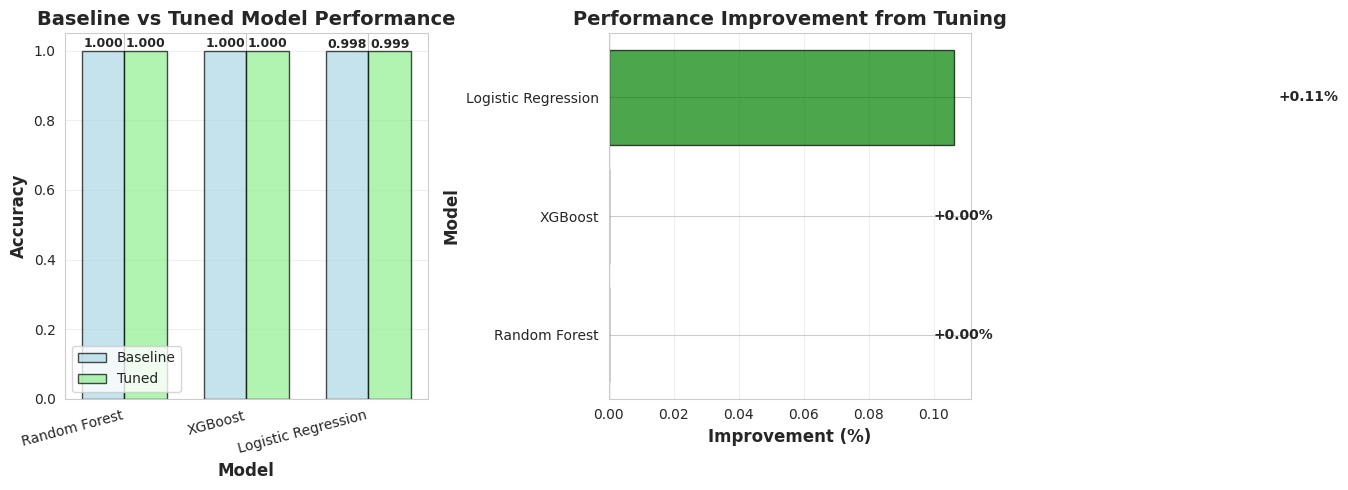

BEST PERFORMING MODEL

🏆 Winner: Random Forest
   Accuracy: 1.0000 (100.00%)
   Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}



In [ ]:
# Create comparison dataframe
comparison_data = []
for model_name in baseline_results.keys():
    comparison_data.append({
        'Model': model_name,
        'Baseline Accuracy': baseline_results[model_name],
        'Tuned Accuracy': tuned_results[model_name],
        'Improvement': tuned_results[model_name] - baseline_results[model_name]
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Tuned Accuracy', ascending=False).reset_index(drop=True)

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print("\nBaseline vs Tuned Models:\n")
for idx, row in comparison_df.iterrows():
    print(f"{idx+1}. {row['Model']}")
    print(f"   Baseline:    {row['Baseline Accuracy']:.4f} ({row['Baseline Accuracy']*100:.2f}%)")
    print(f"   Tuned:       {row['Tuned Accuracy']:.4f} ({row['Tuned Accuracy']*100:.2f}%)")
    print(f"   Improvement: {row['Improvement']:+.4f} ({row['Improvement']*100:+.2f}%)")
    print()

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart comparison
x = np.arange(len(comparison_df))
width = 0.35
axes[0].bar(x - width/2, comparison_df['Baseline Accuracy'], width, label='Baseline', 
            color='lightblue', edgecolor='black', alpha=0.7)
axes[0].bar(x + width/2, comparison_df['Tuned Accuracy'], width, label='Tuned', 
            color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Baseline vs Tuned Model Performance', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, row in comparison_df.iterrows():
    axes[0].text(i - width/2, row['Baseline Accuracy'] + 0.01, f"{row['Baseline Accuracy']:.3f}", 
                ha='center', fontsize=9, fontweight='bold')
    axes[0].text(i + width/2, row['Tuned Accuracy'] + 0.01, f"{row['Tuned Accuracy']:.3f}", 
                ha='center', fontsize=9, fontweight='bold')

# Improvement chart
colors = ['green' if x > 0 else 'red' for x in comparison_df['Improvement']]
axes[1].barh(comparison_df['Model'], comparison_df['Improvement']*100, color=colors, 
             edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Improvement (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Model', fontsize=12, fontweight='bold')
axes[1].set_title('Performance Improvement from Tuning', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, row in comparison_df.iterrows():
    axes[1].text(row['Improvement']*100 + 0.1, i, f"{row['Improvement']*100:+.2f}%", 
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("BEST PERFORMING MODEL")
print("="*80)
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Tuned Accuracy']
print(f"\n Winner: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"   Best Parameters: {best_params[best_model_name]}")
print("\n" + "="*80)

### 5.7 Detailed Evaluation of Best Model
Perform comprehensive evaluation of the best model including confusion matrix, classification report, and other metrics.

DETAILED EVALUATION: RANDOM FOREST

1. CONFUSION MATRIX
--------------------------------------------------------------------------------

Confusion Matrix:
[[ 11   0   0]
 [  0  67   0]
 [  0   0 864]]

How to read:
  • Rows = Actual classes
  • Columns = Predicted classes
  • Diagonal = Correct predictions


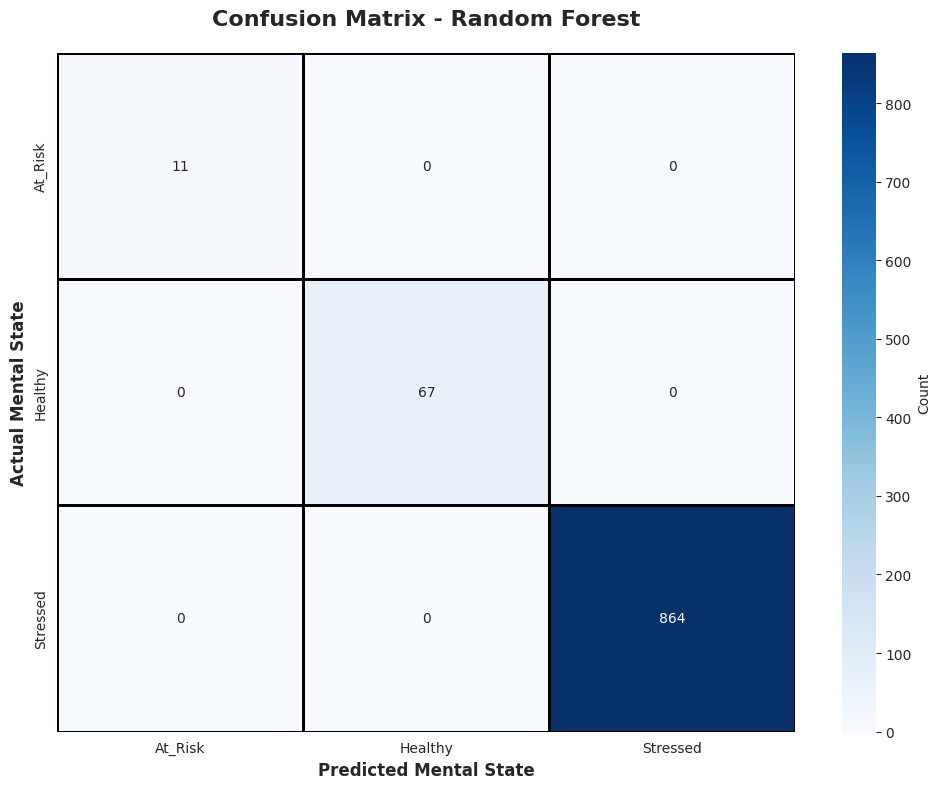


2. CLASSIFICATION REPORT

Metrics explanation:
  • Precision: Of all predicted as this class, how many are correct?
  • Recall: Of all actual samples in this class, how many did we find?
  • F1-Score: Harmonic mean of precision and recall
  • Support: Number of actual samples in each class

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     At_Risk       1.00      1.00      1.00        11
     Healthy       1.00      1.00      1.00        67
    Stressed       1.00      1.00      1.00       864

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

3. PER-CLASS PERFORMANCE

At_Risk:
  Precision: 1.0000 - 100.00% of predictions are correct
  Recall:    1.0000 - Found 100.00% of actual cases
  F1-Score:  1.0000 - Overall balance of precision and recall

Healthy:
  Precision: 1.0000 - 100.00%

In [34]:
# Get the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = tuned_models[best_model_name]

# Make predictions with the best model
if best_model_name == 'Logistic Regression':
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

print("="*80)
print(f"DETAILED EVALUATION: {best_model_name.upper()}")
print("="*80)

# 1. Confusion Matrix
print("\n1. CONFUSION MATRIX")
print("-"*80)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nHow to read:")
print("  • Rows = Actual classes")
print("  • Columns = Predicted classes")
print("  • Diagonal = Correct predictions")

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
class_names = le_mental_state.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=1, linecolor='black')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Mental State', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Mental State', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Classification Report
print("\n" + "="*80)
print("2. CLASSIFICATION REPORT")
print("="*80)
print("\nMetrics explanation:")
print("  • Precision: Of all predicted as this class, how many are correct?")
print("  • Recall: Of all actual samples in this class, how many did we find?")
print("  • F1-Score: Harmonic mean of precision and recall")
print("  • Support: Number of actual samples in each class")
print("\n" + "-"*80)
print(classification_report(y_test, y_pred, target_names=class_names))

# 3. Per-class Metrics
print("="*80)
print("3. PER-CLASS PERFORMANCE")
print("="*80)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

for i, class_name in enumerate(class_names):
    print(f"\n{class_name}:")
    print(f"  Precision: {precision[i]:.4f} - {precision[i]*100:.2f}% of predictions are correct")
    print(f"  Recall:    {recall[i]:.4f} - Found {recall[i]*100:.2f}% of actual cases")
    print(f"  F1-Score:  {f1[i]:.4f} - Overall balance of precision and recall")

# 4. Overall Metrics
print("\n" + "="*80)
print("4. OVERALL METRICS")
print("="*80)
overall_accuracy = accuracy_score(y_test, y_pred)
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy:        {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
print(f"Macro Precision: {macro_precision:.4f} ({macro_precision*100:.2f}%)")
print(f"Macro Recall:    {macro_recall:.4f} ({macro_recall*100:.2f}%)")
print(f"Macro F1-Score:  {macro_f1:.4f} ({macro_f1*100:.2f}%)")
print("\n" + "="*80)

### 5.8 Feature Importance Analysis
Understand which features are most important for predicting mental health states. This helps identify key factors that influence mental wellbeing.

FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features for Random Forest:

--------------------------------------------------------------------------------
psychological_distress                   0.2202 ██████████████████████
stress_level                             0.2065 ████████████████████
anxiety_level                            0.1203 ████████████
social_media_time_min                    0.1097 ██████████
mood_level                               0.0799 ███████
daily_screen_time_min                    0.0724 ███████
lifestyle_health_score                   0.0475 ████
physical_activity_min                    0.0449 ████
sleep_hours                              0.0333 ███
social_media_ratio                       0.0186 █
age                                      0.0136 █
negative_interactions_count              0.0122 █
positive_interactions_count              0.0075 
low_activity                             0.0053 
platform_encoded                         0.0038 


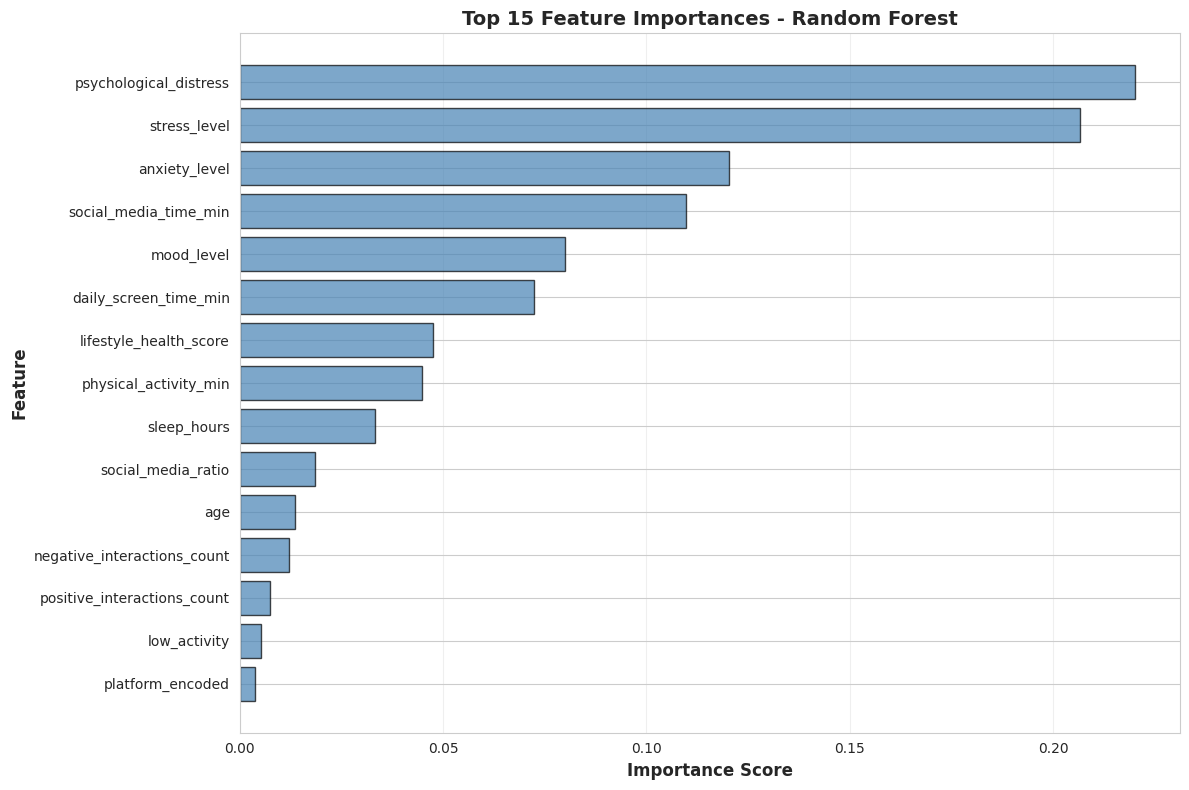


KEY INSIGHTS FROM FEATURE IMPORTANCE

Importance by Category:

Psychological             0.6269 (62.7%)
Lifestyle                 0.1256 (12.6%)
Social Interactions       0.0218 (2.2%)
Screen Time               0.2007 (20.1%)



In [35]:
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Feature importance is available for tree-based models
if best_model_name in ['Random Forest', 'XGBoost']:
    # Get feature importances
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 15 Most Important Features for {best_model_name}:\n")
    print("-"*80)
    for idx, row in feature_importance_df.head(15).iterrows():
        print(f"{row['Feature']:40s} {row['Importance']:.4f} {'█' * int(row['Importance'] * 100)}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', 
             edgecolor='black', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("KEY INSIGHTS FROM FEATURE IMPORTANCE")
    print("="*80)
    
    # Categorize features
    psychological_features = ['anxiety_level', 'stress_level', 'mood_level', 'psychological_distress']
    lifestyle_features = ['sleep_hours', 'physical_activity_min', 'lifestyle_health_score']
    social_features = ['negative_interactions_count', 'positive_interactions_count', 
                       'interaction_balance', 'net_interactions']
    screen_features = ['daily_screen_time_min', 'social_media_time_min', 'social_media_ratio']
    
    # Calculate category importance
    categories = {
        'Psychological': psychological_features,
        'Lifestyle': lifestyle_features,
        'Social Interactions': social_features,
        'Screen Time': screen_features
    }
    
    print("\nImportance by Category:\n")
    for category, features in categories.items():
        category_importance = feature_importance_df[
            feature_importance_df['Feature'].isin(features)
        ]['Importance'].sum()
        print(f"{category:25s} {category_importance:.4f} ({category_importance*100:.1f}%)")

else:
    # For Logistic Regression, show coefficient magnitudes
    coefficients = np.abs(best_model.coef_[0])
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)
    
    print(f"\nTop 15 Most Influential Features for {best_model_name}:\n")
    print("-"*80)
    print("(Based on absolute coefficient values)")
    for idx, row in feature_importance_df.head(15).iterrows():
        normalized = row['Coefficient'] / feature_importance_df['Coefficient'].max()
        print(f"{row['Feature']:40s} {row['Coefficient']:.4f} {'█' * int(normalized * 50)}")
    
    # Visualize
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Coefficient'], color='coral', 
             edgecolor='black', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Absolute Coefficient Value', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title(f'Top 15 Feature Coefficients - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)

### 5.9 Cross-Validation Performance
Perform cross-validation to ensure our model's performance is consistent across different data splits. This helps verify that the model generalizes well and isn't overfitting.

CROSS-VALIDATION ANALYSIS

Performing 5-fold cross-validation on all tuned models...
This splits the training data into 5 parts, training on 4 and validating on 1,
repeating 5 times to get a robust performance estimate.

--------------------------------------------------------------------------------
Cross-validating: Logistic Regression
--------------------------------------------------------------------------------
Fold scores: ['0.9987', '0.9973', '0.9987', '0.9973', '0.9973']
Mean CV Accuracy: 0.9979 (99.79%)
Std Deviation:    0.0007 (±0.07%)
Min-Max Range:    0.9973 - 0.9987

--------------------------------------------------------------------------------
Cross-validating: Random Forest
--------------------------------------------------------------------------------
Fold scores: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Mean CV Accuracy: 1.0000 (100.00%)
Std Deviation:    0.0000 (±0.00%)
Min-Max Range:    1.0000 - 1.0000

--------------------------------------------------

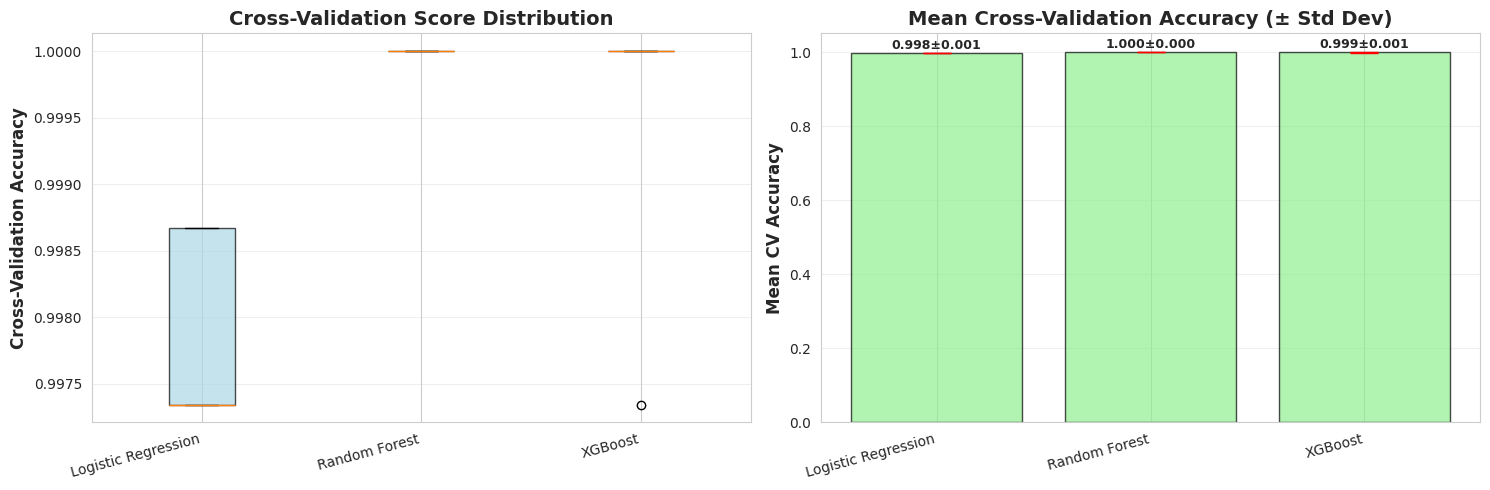

CROSS-VALIDATION SUMMARY

               Model Mean CV Accuracy Std Dev Test Accuracy
      Random Forest           1.0000  0.0000        1.0000
            XGBoost           0.9995  0.0011        1.0000
Logistic Regression           0.9979  0.0007        0.9989

INTERPRETATION:
✓ Low standard deviation = Consistent performance across folds
✓ CV accuracy ≈ Test accuracy = Good generalization, no overfitting
✓ CV accuracy > Test accuracy = Model might be slightly overfit
✓ CV accuracy < Test accuracy = Got lucky with test set split


In [ ]:
print("="*80)
print("CROSS-VALIDATION ANALYSIS")
print("="*80)
print("\nPerforming 5-fold cross-validation on all tuned models...")
print("This splits the training data into 5 parts, training on 4 and validating on 1,")
print("repeating 5 times to get a robust performance estimate.\n")

cv_results = {}

for model_name, model in tuned_models.items():
    print("-"*80)
    print(f"Cross-validating: {model_name}")
    print("-"*80)
    
    # Use appropriate data (scaled for Logistic Regression, original for others)
    if model_name == 'Logistic Regression':
        X_cv = X_train_scaled
    else:
        X_cv = X_train
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_cv, y_train, cv=5, scoring='accuracy')
    
    cv_results[model_name] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }
    
    print(f"Fold scores: {[f'{score:.4f}' for score in cv_scores]}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
    print(f"Std Deviation:    {cv_scores.std():.4f} (±{cv_scores.std()*100:.2f}%)")
    print(f"Min-Max Range:    {cv_scores.min():.4f} - {cv_scores.max():.4f}")
    print()

# Visualize cross-validation results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot of CV scores
cv_data = [cv_results[model]['scores'] for model in tuned_models.keys()]
bp = axes[0].boxplot(cv_data, labels=tuned_models.keys(), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')
    patch.set_alpha(0.7)
axes[0].set_ylabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(tuned_models.keys(), rotation=15, ha='right')

# Mean CV accuracy with error bars
model_names = list(cv_results.keys())
means = [cv_results[m]['mean'] for m in model_names]
stds = [cv_results[m]['std'] for m in model_names]

axes[1].bar(model_names, means, yerr=stds, capsize=10, color='lightgreen', 
            edgecolor='black', alpha=0.7, error_kw={'linewidth': 2, 'ecolor': 'red'})
axes[1].set_ylabel('Mean CV Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Mean Cross-Validation Accuracy (± Std Dev)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(model_names, rotation=15, ha='right')

# Add value labels
for i, (mean, std) in enumerate(zip(means, stds)):
    axes[1].text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}', 
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("="*80)
print("CROSS-VALIDATION SUMMARY")
print("="*80)
cv_summary = pd.DataFrame([
    {
        'Model': model_name,
        'Mean CV Accuracy': f"{results['mean']:.4f}",
        'Std Dev': f"{results['std']:.4f}",
        'Test Accuracy': f"{tuned_results[model_name]:.4f}"
    }
    for model_name, results in cv_results.items()
]).sort_values('Mean CV Accuracy', ascending=False)

print("\n", cv_summary.to_string(index=False))
print("\n" + "="*80)